# Project 4: AllLife Bank Loan Model 
Student : Cameron Presley

Version : 2021.04.06

email : cameron@ignitedzen.net

Dataset Filename : Loan_Modelling.csv

# Background and Context

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

# Objective

1.  To predict whether a liability customer will buy a personal loan or not.

2.  Which variables are most significant.

3.  Which segment of customers should be targeted more.
 

# Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Universal Bank?

# Outline, Actions, and Key Deliverables

1.  Exploratory Data Analysis
    - Univariate analysis
    - Bivariate analysis
    - Multivariate analysis

2.  Insights based on EDA

3.  Data Pre-processing

    - Prepare the data for analysis 
    - Missing value Treatment, Outlier Detection/Treatment, Feature Engineering, Data Prep, Model Split

4.  Model building - Logistic Regression
    - Build the model and comment on the model statistics 
    - Test assumptions 
    - Filter out key variables that have a strong relationship with the dependent variable

5.  Model performance evaluation and opportunities for improvement


6.  Model building - Decision Tree

* Model performance evaluation and opportunities for improvement
* Actionable Insights & Recommendations
* Misclassification analysis

7.  Summary and Conclusions

    - Key Takeaways 
    - Recommendations to Grow the Business





# Build header + import necessary libraries : numpy, pandas, seaborn, matplotlib.pyplot, etc., read in the dataset, set some styling

In [1]:
#Build a basic program header

student = 'Cameron Presley'
version = '2021.04.06'
email = 'cameron@ignitedzen.net'
title =  'Project 4:  AllLife Bank Loan Model'
dataset_filename = 'Loan_Modelling.csv'

print ('Project Title :', title)
print ('')
print ('Student :', student)
print ('')
print ('Version :', version)
print ('')
print ('email :', email)
print ('')
print ('Dataset Filename :', dataset_filename)
print ('')


#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np #working with arrays and applying linear algebra
import pandas as pd #needed for data analysis and dealing with data sets in general
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
import scipy.stats as stats #needed for statistical anlaysis
import statsmodels.api as sm #needed for building a contingency table from a Dataframe
from statsmodels.stats.proportion import proportions_ztest # for proportion Z test
from statsmodels.formula.api import ols # for ANOVA
from statsmodels.stats.anova import anova_lm # for ANOVA
from scipy.stats import chi2_contingency # for CHI SQUARE
from scipy.stats import ttest_rel #paired T-test
from scipy.stats import levene #Levene's test
import math #needed for some math functions such as sqrt
from sklearn.preprocessing import OneHotEncoder #load in case I need to one-hot encoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

#use seaborn styling - white grid

sns.set_style("whitegrid")


#Load Customer Data and check the basic struture ( the shape - rows + columns)

data = pd.read_csv('Loan_Modelling.csv')


# we should always protect the original data, so assigning the data to another variable to prevent changes to the original data set


df = data.copy()

#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

row_num = df.shape[0]
print ('row_num =', row_num)

Project Title : Project 4:  AllLife Bank Loan Model

Student : Cameron Presley

Version : 2021.04.06

email : cameron@ignitedzen.net

Dataset Filename : Loan_Modelling.csv

There are 5000 rows and 14 columns.
row_num = 5000


# Initial Data Review

In [2]:
#open up view of columns and increase view of row data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#set a seed value to get the same results with each random sampling of the table

np.random.seed(20)
df.sample(n=15)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
71      72   53          29      69    93907       4   1.00          2   
1561  1562   46          20      73    93106       1   1.50          2   
2439  2440   51          25      30    91116       3   0.60          2   
1294  1295   34          10      71    95003       1   0.10          1   
1946  1947   53          23      58    94720       4   2.00          3   
4787  4788   48          22      42    95054       3   0.60          2   
4552  4553   50          23      64    92037       1   2.67          2   
4138  4139   47          22     114    95819       1   0.60          1   
4513  4514   43          19     114    92325       1   1.70          1   
12      13   48          23     114    93106       2   3.80          3   
4244  4245   51          26      55    92121       3   2.00          2   
1885  1886   31           6      19    96001       4   1.10          3   
4255  4256   59          35      78    90095       2   2.80          1   
3904  3905   29           5      18    94122       1   0.40          3   
2757  2758   63          38      50    93943       2   2.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
71           0              0                   0           0       1   
1561       128              0                   0           0       1   
2439       144              0                   0           0       0   
1294       257              0                   0           0       1   
1946         0              0                   0           0       1   
4787       121              0                   0           0       1   
4552         0              0                   0           0       0   
4138         0              0                   1           1       1   
4513         0              0                   0           0       1   
12           0              0                   1           0       0   
4244        93              0                   0           0       1   
1885       104              0                   0           1       1   
4255         0              0                   0           0       1   
3904        94              0                   0           0       1   
2757       205              0                   0           0       0   

      CreditCard  
71             0  
1561           0  
2439           1  
1294           1  
1946           1  
4787           0  
4552           0  
4138           1  
4513           0  
12             0  
4244           0  
1885           1  
4255           0  
3904           1  
2757           0

In [3]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# initial insights

* ID : is a number, unclear if there is any value in this variable

* Age, Experience, Income, Mortgage are numeric and continuous, OK as integers, no change required

* CCAvg is continuous.

* ZIPCode will be potentially complex to visulize depending on how many unique values we have.  We may need to group and simiplify before consuming in model building.  Will explore later.  Needs to be converted to category.

* Family and Education is currently set a numeric, integer.  Based on what we know from the data dictionary, this variable will behave better as a Category for EDA.

* Personal_Loan, Securities_Account, CD_Account, Online, and Credit card are coded as Integers.  However, based on the data dictionary, we know they will behave as Boolean.  The data dictionary was not clear, but we will assume that 0 = False and 1=True.


In [6]:
df.describe(include='all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [7]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.isnull().values.any() # If there are any null values in data set

False

* there are no obviously missing values in the data
* will explore other hidden "missing values" later (i.e., do we have zeroes or other values in variables that are not congruent with the definitions in the data dictionary).

In [9]:
# check the unique values
# each row for each column
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


* there are 5,000 unique IDs.  It counts sequentially starting at 1 and tracks row by row with the df index + 1 (i.e., df index starts at 0).  Will keep it is as numeric, but do not execpt it to add any value to modeling.

* ZIP Code has 467 unique values and represents a challenge for dimensionality.  Will explore grouping on State, County, City, etc. to reduce dimensionality.



### first glance at the variable data distribution

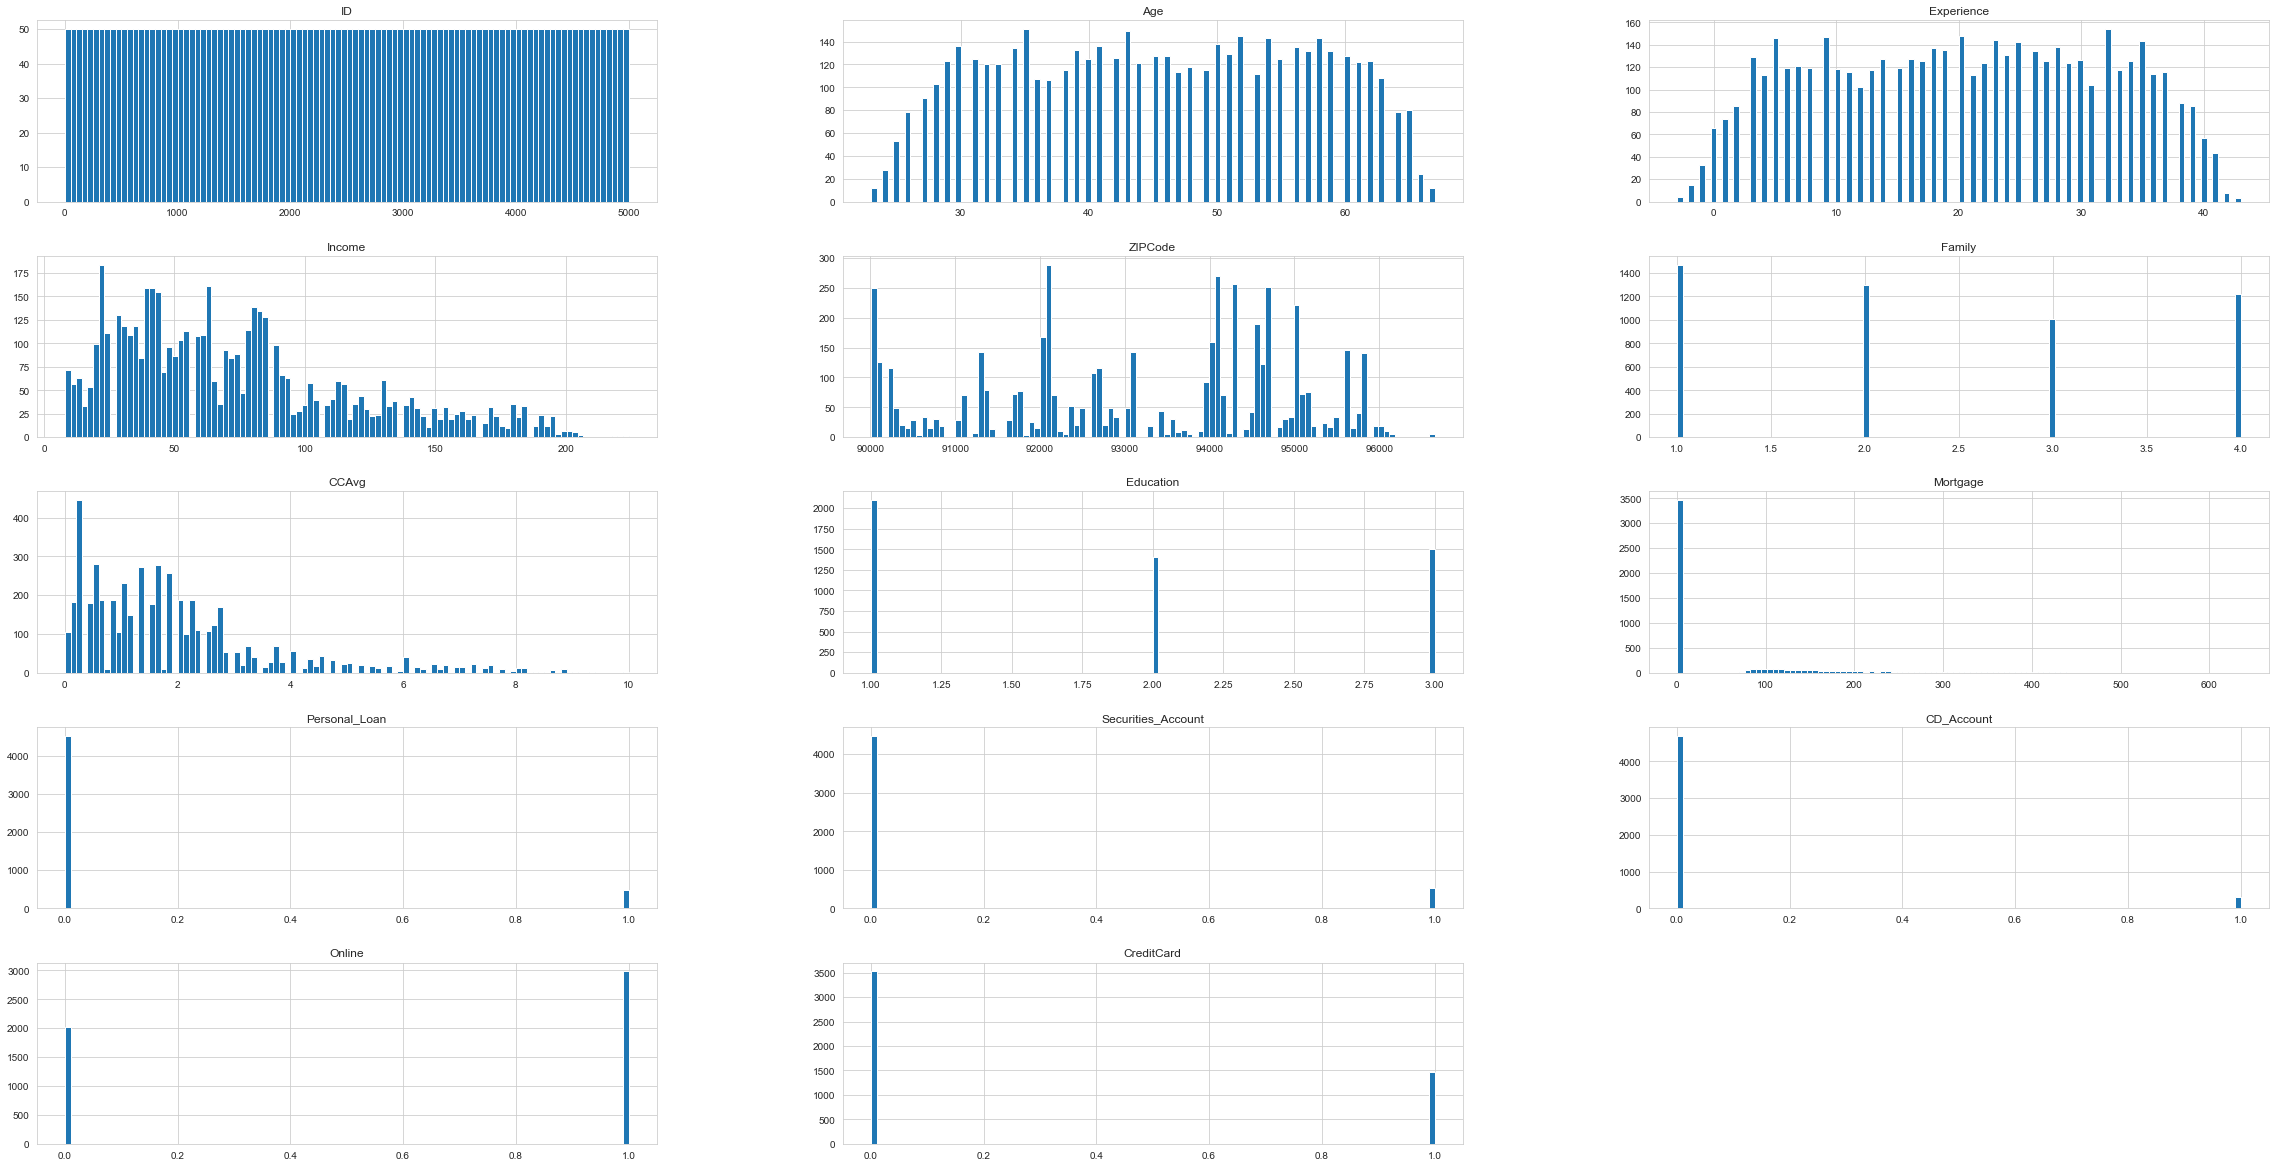

In [10]:
columns = list(df)[0:] #showing all columns
df[columns].hist(stacked=False, bins=100, figsize=(40,64), layout=(15,3)); 


* Age and Experience have a very similar distribution
* Income is right skewed
* ZIPCode, while not a continuous value, does reveal that there are pockets of zip codes that occur in higher frequencies.  This suggests that grouping could be effective.
* Family and Education should be treated as categories.
* The majority of customers do not have a Mortgage, Securities_Account, CD_Account, or CreditCard with the bank.
* The majority of the customer did not buy a Personal_Loan product during the last campaign.
* While there are still a large number of customers who do not have an Online account, more customers do.


# 1.  EDA - UNIVARIATE & BIVARIATE & MULTIVARIATE ANALYSIS

## Function for Numerical Variable Analysis

In [11]:

# Cite reference:  leveraging some code snipets from our lectures and other case studies to make
# quick work of some of these visualizations.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="icefire") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Function for Categorical Variable Analysis

In [12]:

# Cite reference:  leveraging some code snipets from our lectures and other case studies to make
# quick work of some of these visualizations.

def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
    plt.show() #show the plot
    


# EDA Univariate Analysis

## Observations on ID


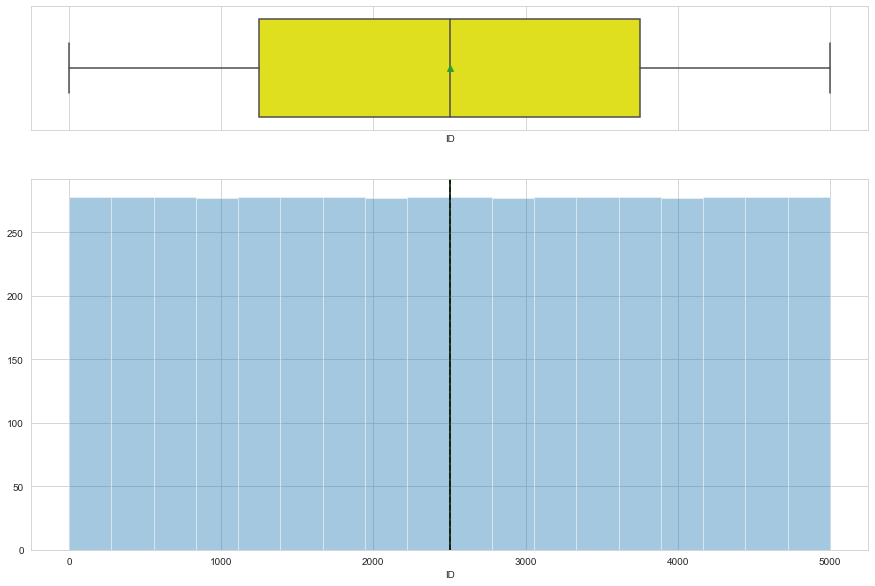

In [13]:
histogram_boxplot(df["ID"])

In [14]:
df["ID"].nunique()

5000

* There are 5000 unique ID numbers for the data set.



## Observations on Age

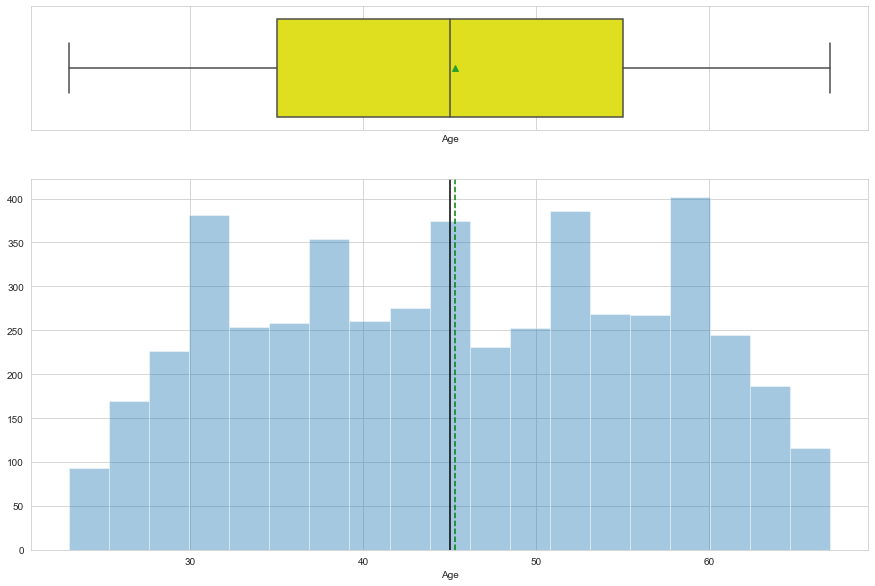

In [15]:
histogram_boxplot(df.Age)

In [16]:
df['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

* Age is symmetrical with no outliers.  
* The average age is ~45 years, with a max of 67 years and min of 23 years.

## Obersvations on Experience

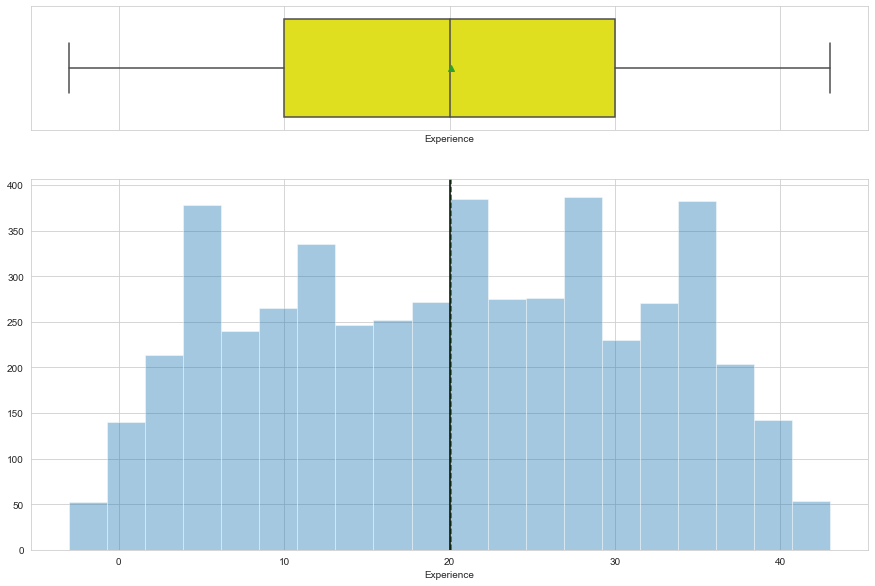

In [17]:
histogram_boxplot(df.Experience)

In [18]:
df['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

* There are no outliers, the distribution is symmetrical (median and mean are ~ equal).

* There are some values for Experience listed as 'negative'.  This doesn't make sense for years experience.  (minimum = -3, should be 0 or greater).  I will  treat this as an error and impute the median value for Experience for any Experience listed as negative, or I may convert them to their absolute value as the negative could be a data-entry error. 

* The mean experience of customers are 20 years. The max experience is 43 years.  The IQR is 20 years. 





## Observations on Income


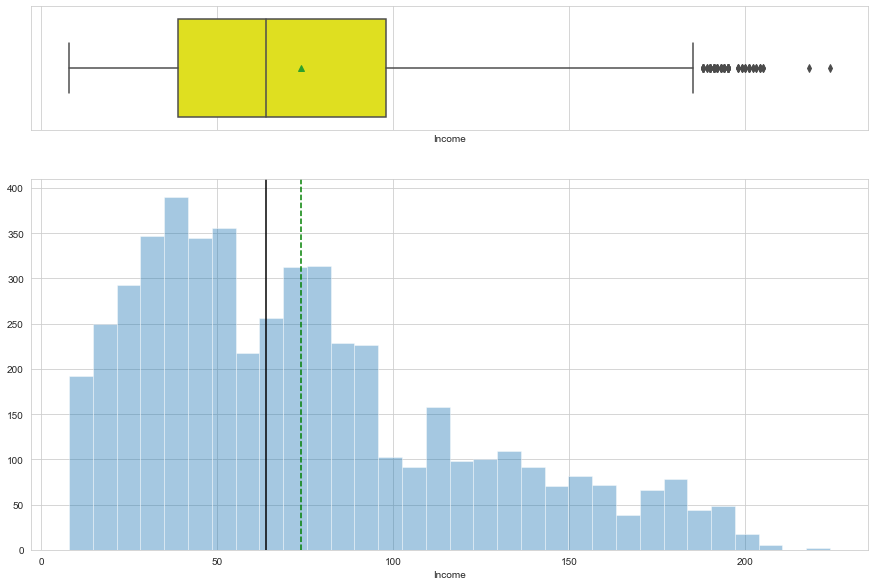

In [19]:
histogram_boxplot(df.Income)

In [20]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

* Income is right skewed, with a mean of 73,774 USD and a median of 64,000 USD.  The max income is 224,000 USD and the min income is 8,000 USD.

* The IQR is 59,000 USD.  There are outliers.



## Observations on ZIPCode

Zip Codes (Post Codes) are numeric in nature, but actually do not behave as numbers, rather categories.

Converrt these to Category dtype and look at any noticeable patterns.  We will need to One Hot Encode these ZIPCodes to build the model.




In [21]:
df["ZIPCode"] = df["ZIPCode"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 541.4 KB


In [22]:
ZIP_group = df.groupby(['ZIPCode'])['ID'].count().sort_values(ascending = False)
ZIP_group_top_contributors = (ZIP_group/df.shape[0])*100
ZIP_group_top_contributors.head(20)

ZIPCode
94720    3.38
94305    2.54
95616    2.32
90095    1.42
93106    1.14
93943    1.08
92037    1.08
91320    1.06
94025    1.04
91711    1.04
92093    1.02
90245    1.00
90024    1.00
90089    0.92
91330    0.92
94304    0.90
92121    0.90
94143    0.74
94608    0.68
95051    0.68
Name: ID, dtype: float64

In [23]:
ZIP_group_top_contributors.describe()

count    467.000000
mean       0.214133
std        0.287635
min        0.020000
25%        0.080000
50%        0.120000
75%        0.240000
max        3.380000
Name: ID, dtype: float64

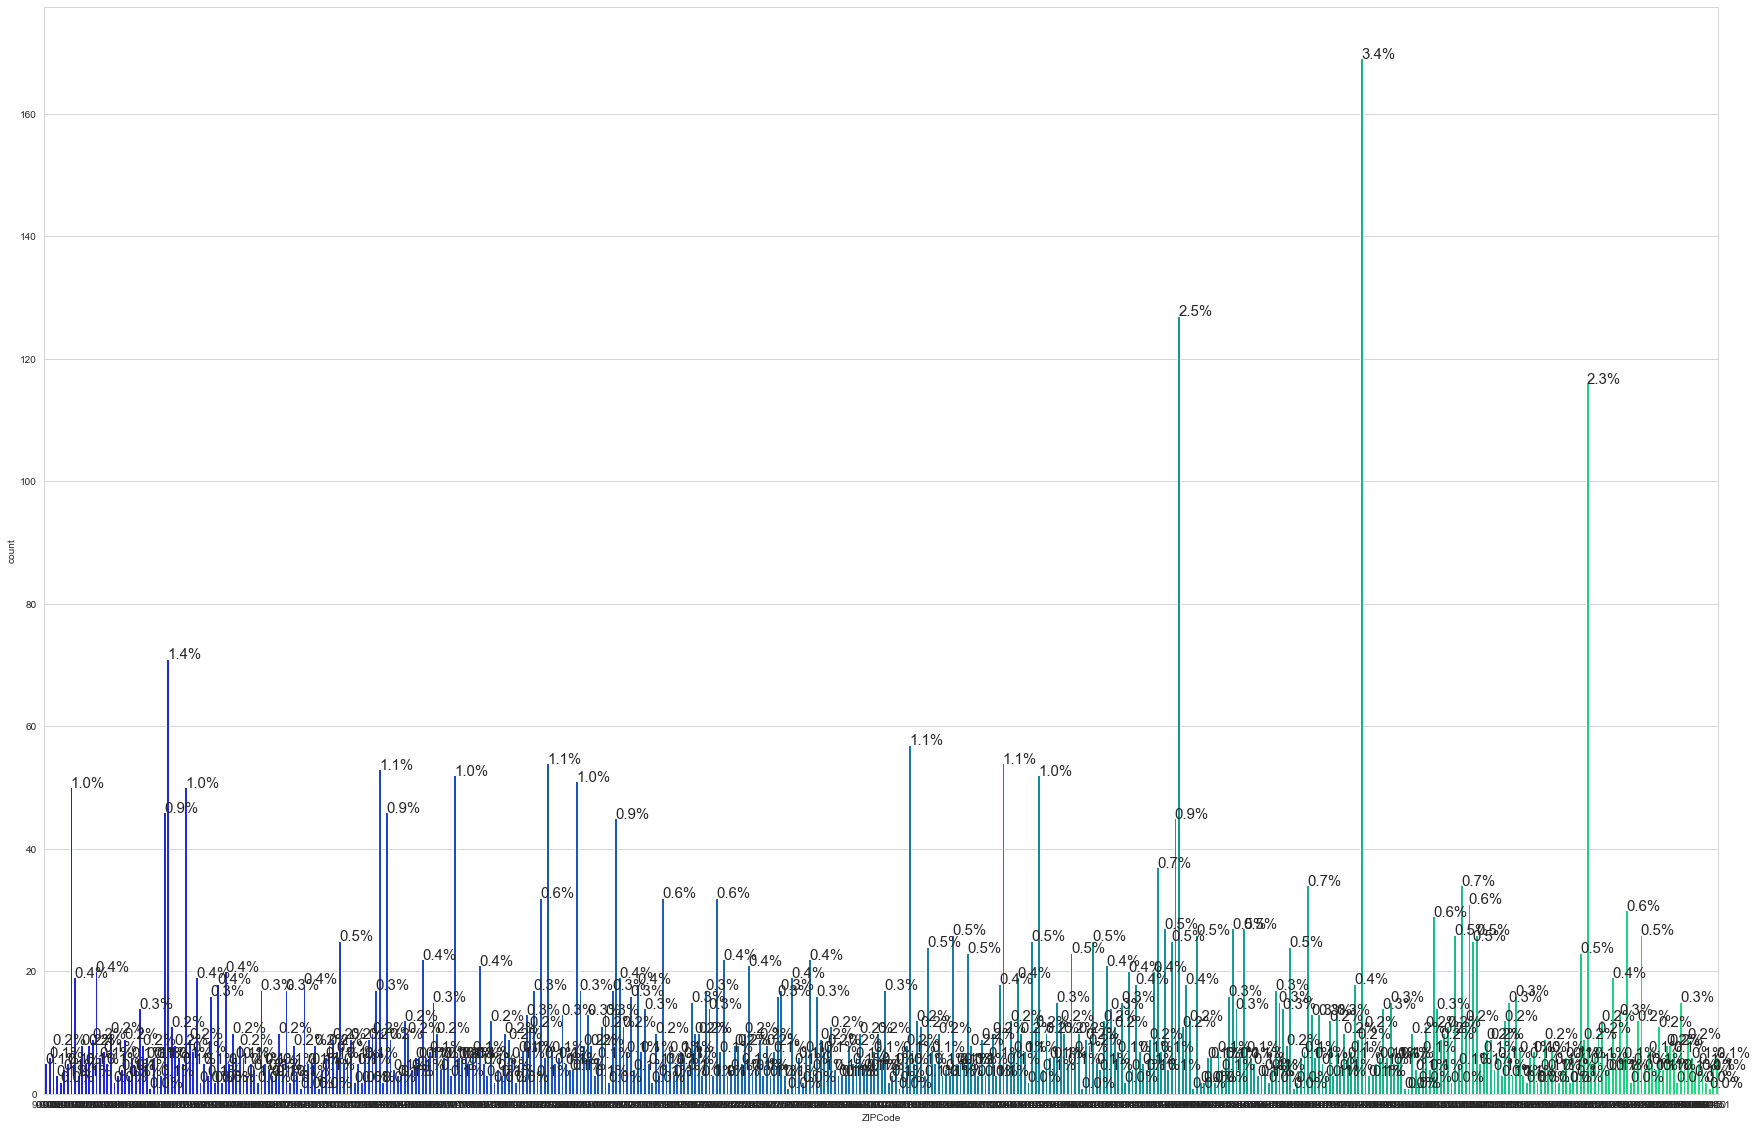

In [24]:
plt.figure(figsize = (30,20))
ax = sns.countplot(df['ZIPCode'], palette = 'winter')
bar_perc (ax,df['ZIPCode'])

* After grouping customers by Zip Code, the max % of customers in any given Zip Code is 3.38% and the minimum is 0.02%.  The IQR shows that 50% of the Zip Codes do not have more than 0.16% of customers in any one Zip Code. 


## Observations on Family

In [25]:
#Convert Family to Category
df["Family"] = df["Family"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(2), float64(1), int64(11)
memory usage: 507.4 KB


In [26]:
df['Family'].describe()

count     5000
unique       4
top          1
freq      1472
Name: Family, dtype: int64

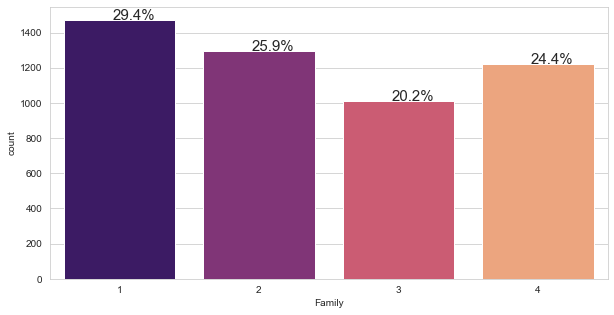

In [27]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Family'], palette = 'magma')
bar_perc (ax,df['Family'])

* Most customers have a family size of 1.  Followed by 2, 4, and 3, respectively.

## Observations on CCAvg


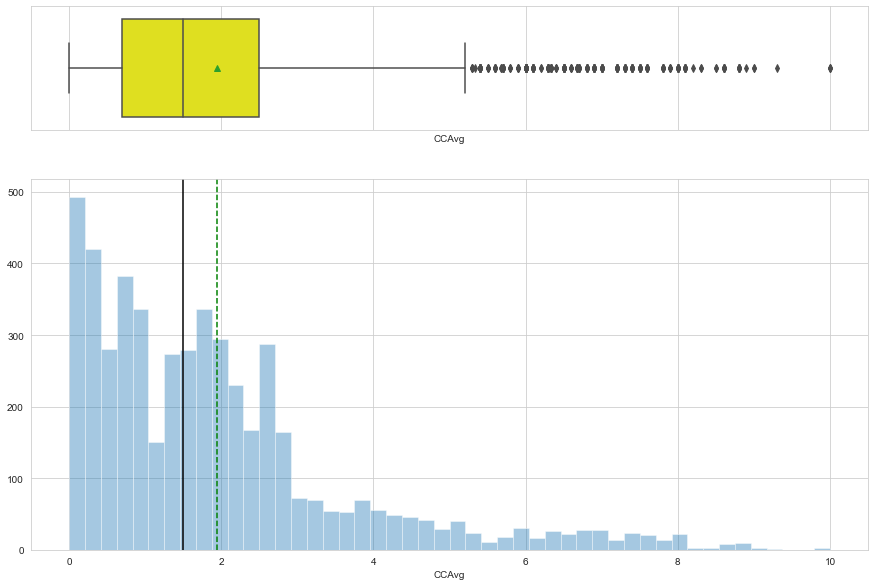

In [28]:
histogram_boxplot(df.CCAvg)


In [29]:
df['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

* The average CC spend for clients is 1,938 USD with a median of 1,500 USD.  There are as significant number of outliers.

* The maximum spend is 10,000 USD and the minimum is 0 USD per month.

* The IQR = 1,800 USD per month.

## Observations on Education


In [30]:
#convert Education to Category
df["Education"] = df["Education"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(3), float64(1), int64(10)
memory usage: 473.3 KB


In [31]:
df['Education'].describe()

count     5000
unique       3
top          1
freq      2096
Name: Education, dtype: int64

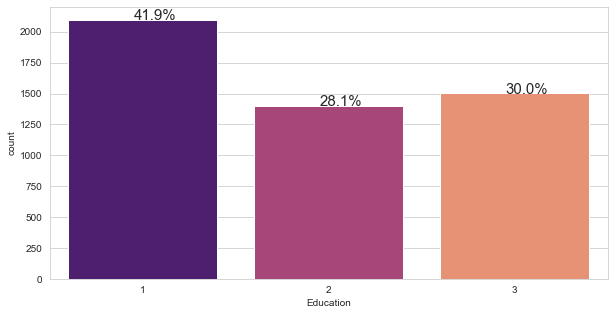

In [32]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Education'], palette = 'magma')
bar_perc (ax,df['Education'])

*  The majority of customers have an undergraduate degree, followed by Advanced Professional, and then those with a Graduate degree.

## Observations on Mortgage



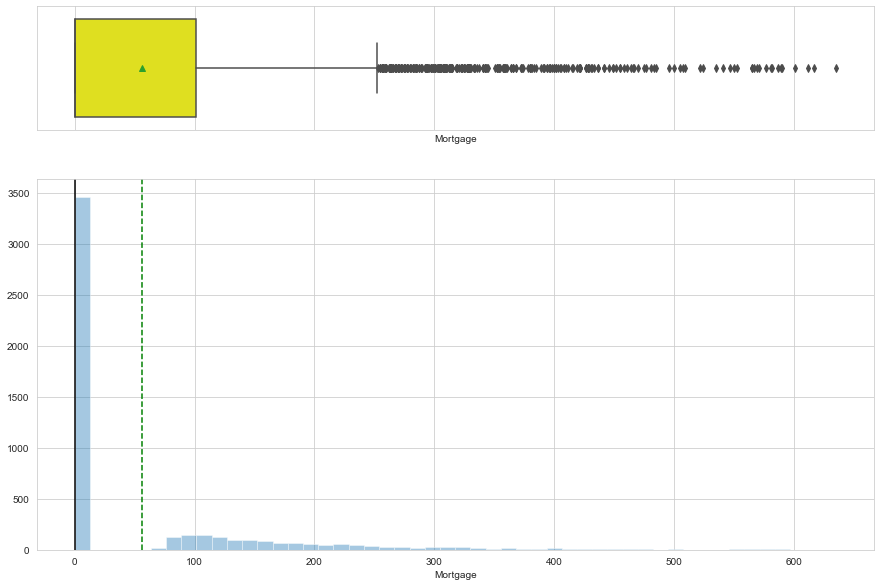

In [33]:
histogram_boxplot(df.Mortgage)

In [34]:
df['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

* Customers range from having no mortgage to a maximum of 635,000 USD.
* The IQR is 101 K USD with a mean of 56.498K USD.


## Observations on Personal Loan

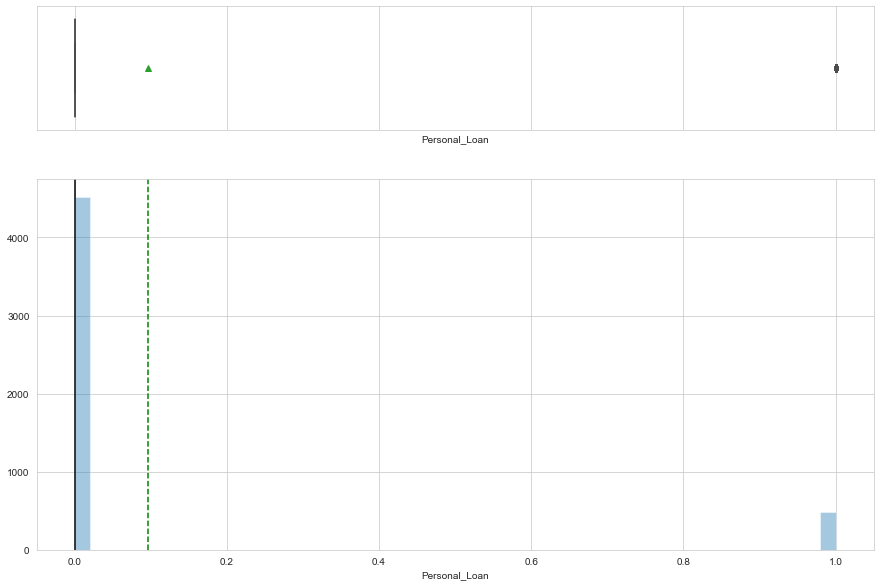

In [35]:
histogram_boxplot(df.Personal_Loan)

In [36]:
df['Personal_Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

In [37]:

# Looking at the number of people who accepted a personal loan in the last campaign as "true"
# and those who did not as false

n_true = df['Personal_Loan'].isin(['1']).sum(axis=0)
n_false = df['Personal_Loan'].isin(['0']).sum(axis=0)
print("Number of customers accepting a Personal Loan in first campaign: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers not accepting a Personal Loan in the first campaign: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers accepting a Personal Loan in first campaign: 480 (9.60%)
Number of customers not accepting a Personal Loan in the first campaign: 4520 (90.40%)


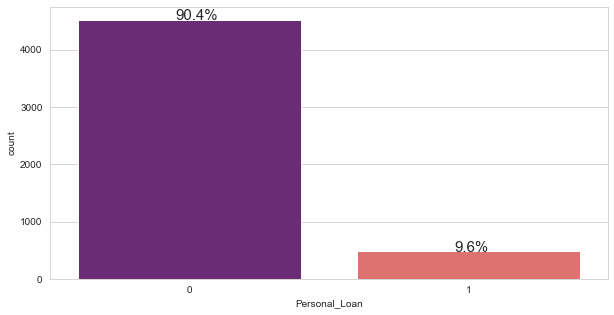

In [38]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Personal_Loan'], palette = 'magma')
bar_perc (ax,df['Personal_Loan'])

* The majority of the customers did not accept the Personal Loan offered to them in the first campaign

## Observations on Securities Account



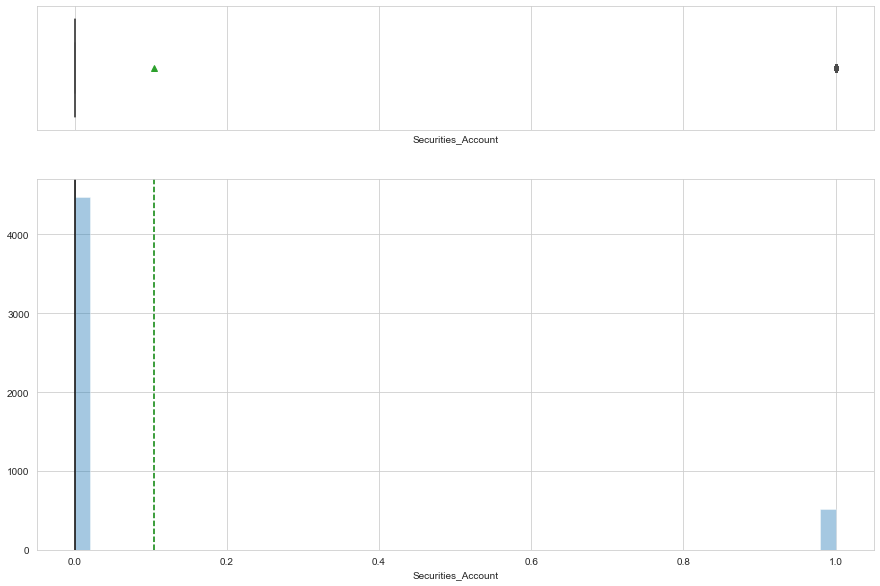

In [39]:
histogram_boxplot(df.Securities_Account)

In [40]:
df['Securities_Account'].describe()

count    5000.000000
mean        0.104400
std         0.305809
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Securities_Account, dtype: float64

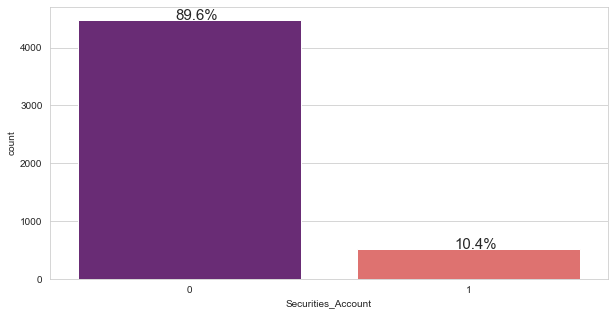

In [41]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Securities_Account'], palette = 'magma')
bar_perc (ax,df['Securities_Account'])

In [42]:
n_true2 = df['Securities_Account'].isin(['1']).sum(axis=0)
n_false2 = df['Securities_Account'].isin(['0']).sum(axis=0)
print("Number of customers with a security account at the bank: {0} ({1:2.2f}%)".format(n_true2, (n_true2 / (n_true2 + n_false2)) * 100 ))
print("Number of customers who do not have a security account at the bank: {0} ({1:2.2f}%)".format(n_false2, (n_false2 / (n_true2 + n_false2)) * 100))

Number of customers with a security account at the bank: 522 (10.44%)
Number of customers who do not have a security account at the bank: 4478 (89.56%)


## Observations on CD_Account

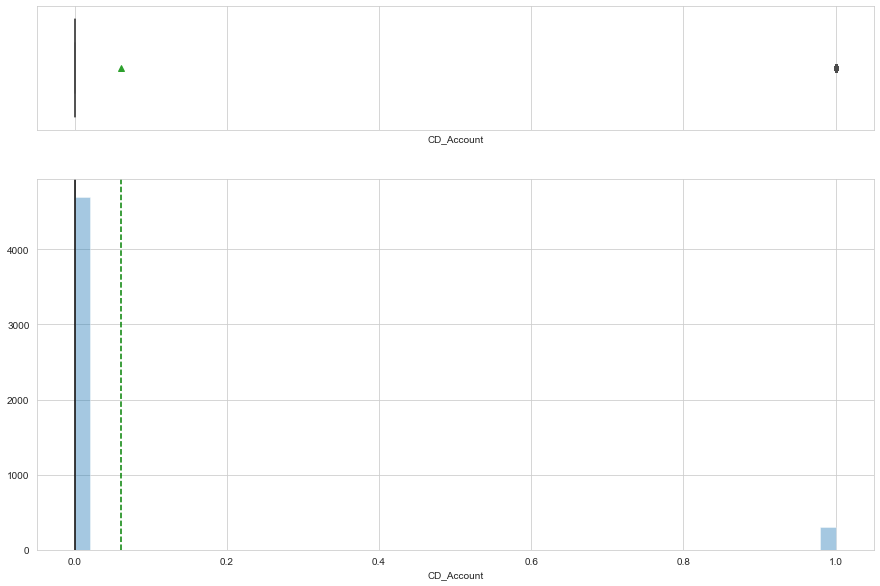

In [43]:
histogram_boxplot(df.CD_Account)

In [44]:
df['CD_Account'].describe()

count    5000.00000
mean        0.06040
std         0.23825
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: CD_Account, dtype: float64

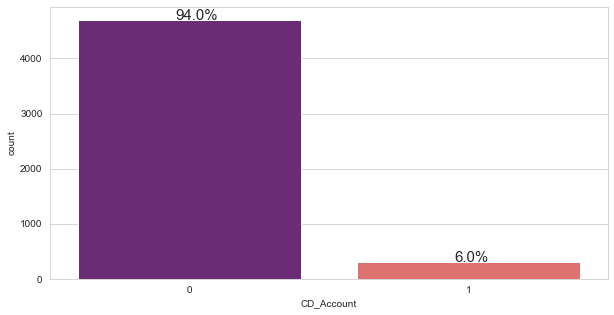

In [45]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['CD_Account'], palette = 'magma')
bar_perc (ax,df['CD_Account'])

In [46]:
n_true3 = df['CD_Account'].isin(['1']).sum(axis=0)
n_false3 = df['CD_Account'].isin(['0']).sum(axis=0)
print("Number of customers with a CD account at the bank: {0} ({1:2.2f}%)".format(n_true3, (n_true3 / (n_true3 + n_false3)) * 100 ))
print("Number of customers who do not have a CD account at the bank: {0} ({1:2.2f}%)".format(n_false3, (n_false3 / (n_true3 + n_false3)) * 100))

Number of customers with a CD account at the bank: 302 (6.04%)
Number of customers who do not have a CD account at the bank: 4698 (93.96%)


## Observations on Online



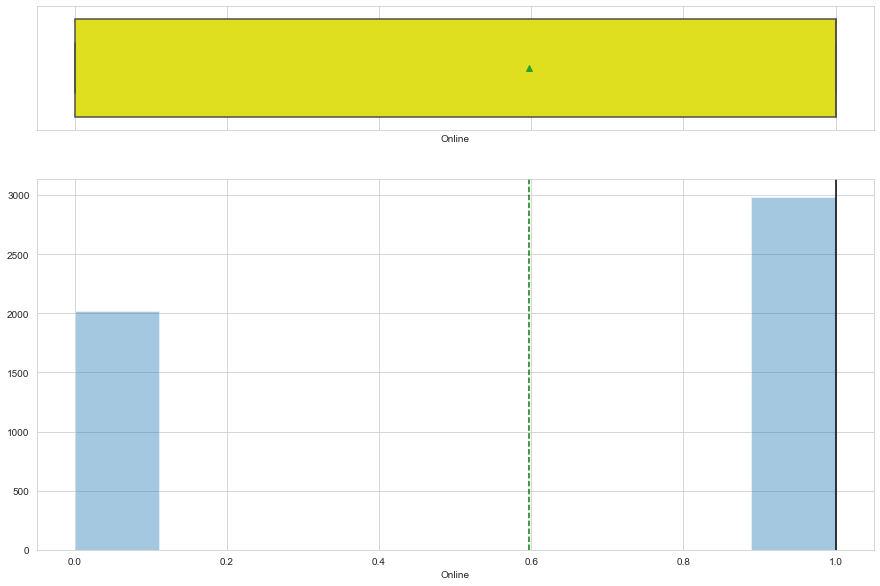

In [47]:
histogram_boxplot(df.Online)

In [48]:
df['Online'].describe()

count    5000.000000
mean        0.596800
std         0.490589
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Online, dtype: float64

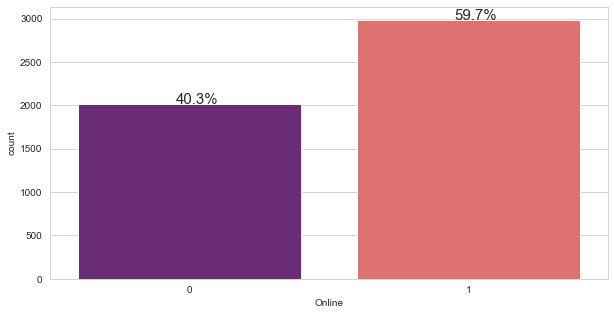

In [49]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Online'], palette = 'magma')
bar_perc (ax,df['Online'])

In [50]:
n_true4 = df['Online'].isin(['1']).sum(axis=0)
n_false4 = df['Online'].isin(['0']).sum(axis=0)
print("Number of customers using Internet Banking: {0} ({1:2.2f}%)".format(n_true4, (n_true4 / (n_true4 + n_false4)) * 100 ))
print("Number of customers who do not use Internet Banking: {0} ({1:2.2f}%)".format(n_false4, (n_false4 / (n_true4 + n_false4)) * 100))

Number of customers using Internet Banking: 2984 (59.68%)
Number of customers who do not use Internet Banking: 2016 (40.32%)


## Observation on Credit Card



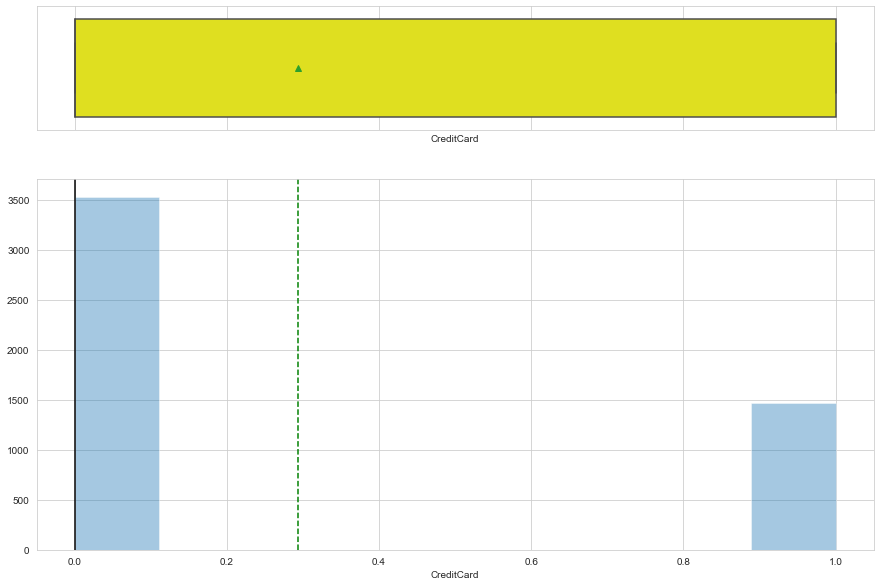

In [51]:
histogram_boxplot(df.CreditCard)

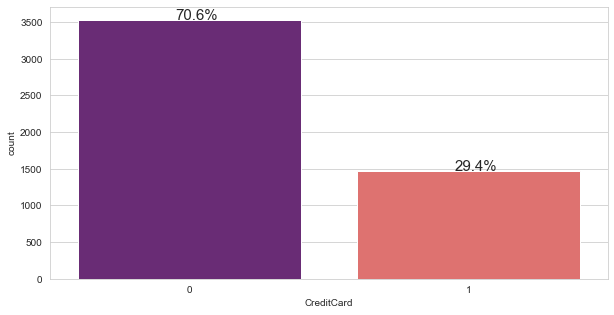

In [52]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['CreditCard'], palette = 'magma')
bar_perc (ax,df['CreditCard'])

In [53]:
n_true5= df['CreditCard'].isin(['1']).sum(axis=0)
n_false5 = df['CreditCard'].isin(['0']).sum(axis=0)
print("Number of customers using Credit Card issued by the bank: {0} ({1:2.2f}%)".format(n_true5, (n_true5 / (n_true5 + n_false5)) * 100 ))
print("Number of customers who do not use Internet Banking: {0} ({1:2.2f}%)".format(n_false5, (n_false5 / (n_true5 + n_false5)) * 100))

Number of customers using Credit Card issued by the bank: 1470 (29.40%)
Number of customers who do not use Internet Banking: 3530 (70.60%)


## Bi-Variate and Multi-Variate Analysis : exploring relationships of variables with Personal_Loan

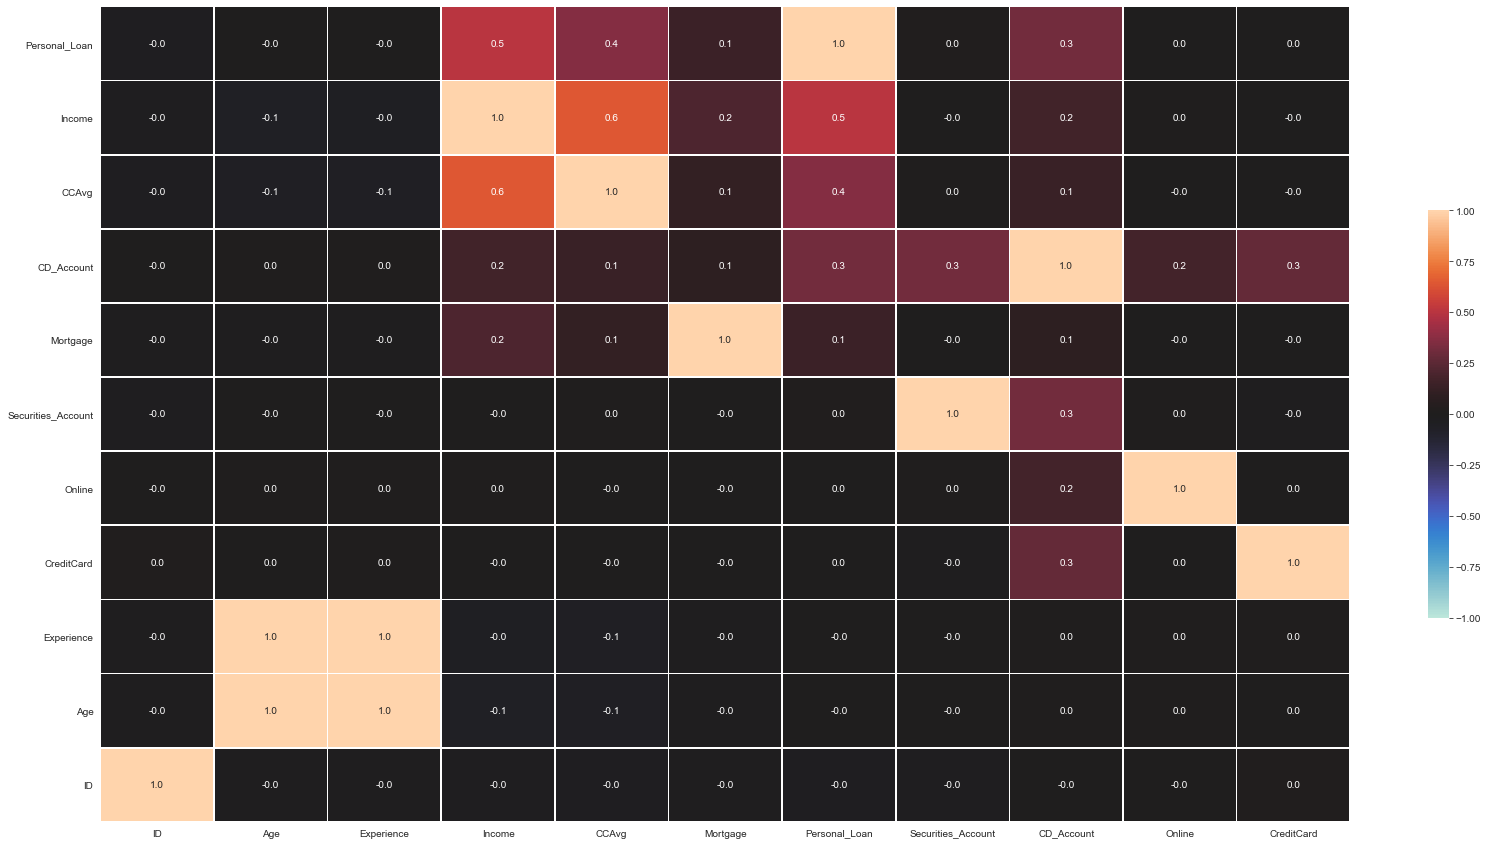

In [54]:

# correlation matrix
# cite reference:  leveraging a code snipet from the Life Expectancy Use Case

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column 
corr = df[numeric_columns].corr().sort_values(by=['Personal_Loan'],ascending= False) # sorting correlations with respect to Price 

#cmaps['Perceptually Uniform Sequential'] = [
#            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

#cmaps['Sequential'] = [
#            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='icefire', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

* AGE and EXPERIENCE are perfectly correlated and will result in Colinearity when we do model building. We will need to drop one before model building.

## explore variable pairs with higher correlation values

* Focus on Target Variable :  Personal_Loan

* Personal Loan v. Income
* CCAvg v. Income

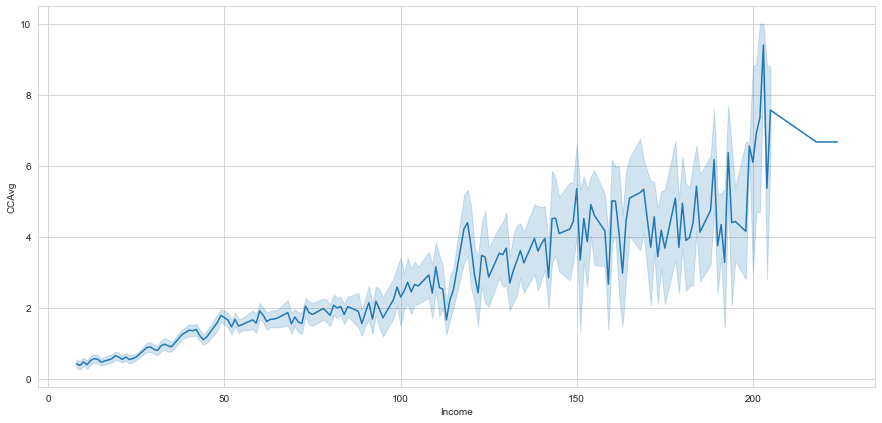

In [55]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Income', y='CCAvg', data=df, palette ='icefire');



* As Income increase, so does the average customer spending on Credit Cards (CCAvg)

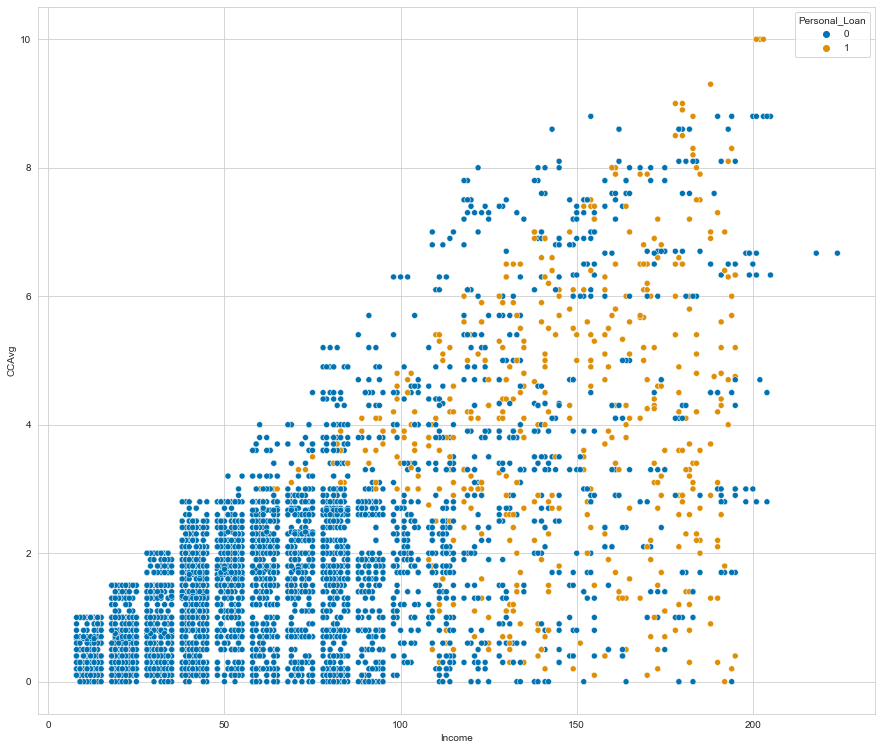

In [56]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='CCAvg', x='Income', hue='Personal_Loan', data=df, palette ='colorblind');

* The acceptance of a Personal Loan did not increase until about 70K - 100K USD.  Why is that?  

* Do people who make more, tend to take on more debt.  Or, are there lending practices that inhibit personal loan acceptance until a specific income threshold?



## Function to visualize Stacked Bar Plots

In [57]:
def stacked_plot(x):
    sns.set (palette = 'nipy_spectral')
    tab1 = pd.crosstab (x,df['Personal_Loan'], margins = True)
    print (tab1)
    print ('-' * 120)
    tab = pd.crosstab (x,df['Personal_Loan'], normalize = 'index')
    tab.plot (kind = 'bar', stacked = True, figsize = (10,5))
    plt.show()

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


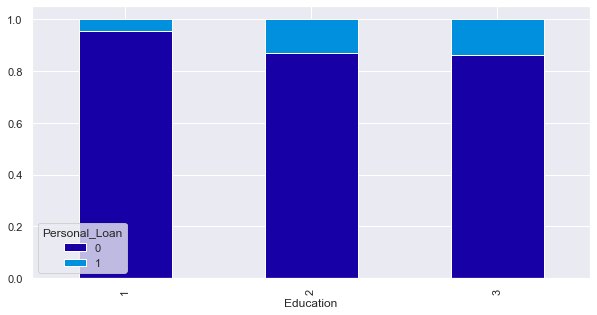

In [58]:
stacked_plot(df['Education'])

* Customers with graduate degrees and advanced professionals had about the same acceptance rate for Personal_Loans. Customers with undergraduate degrees only had the lowest acceptance of Personal Loans.

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


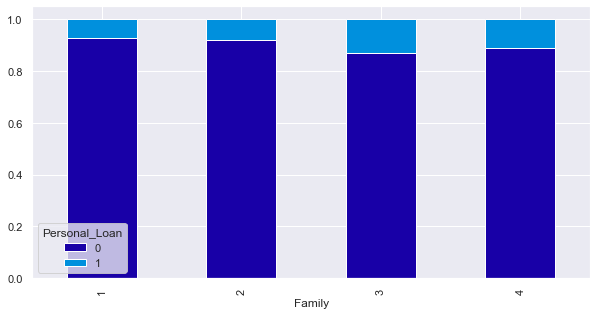

In [59]:
stacked_plot(df['Family'])

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


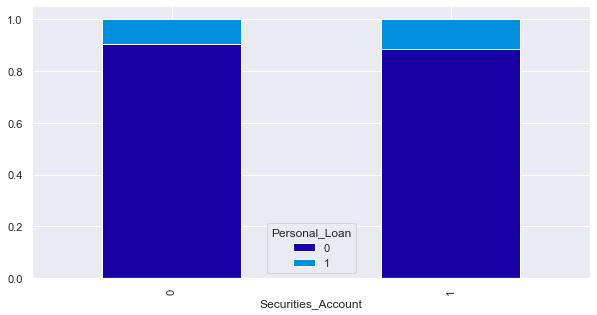

In [60]:
stacked_plot(df['Securities_Account'])

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


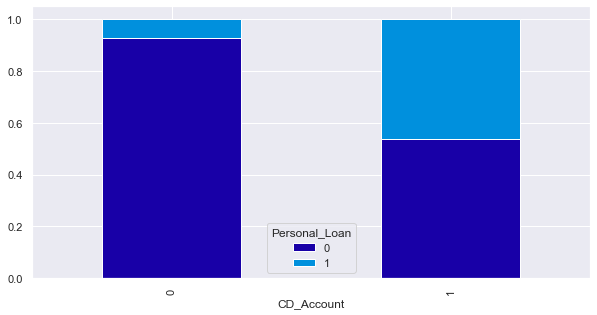

In [61]:
stacked_plot(df['CD_Account'])

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


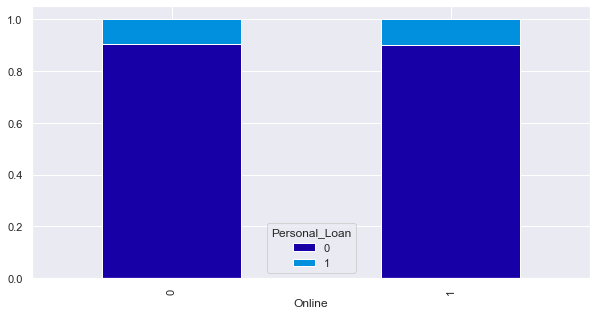

In [62]:
stacked_plot(df['Online'])

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


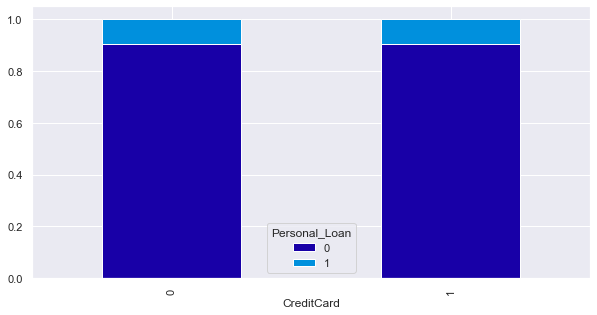

In [63]:
stacked_plot(df['CreditCard'])

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

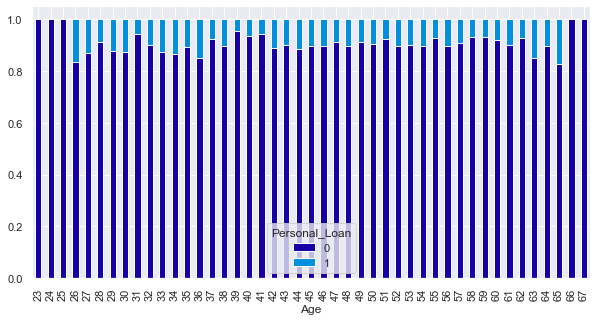

In [64]:
stacked_plot(df['Age'])

Personal_Loan     0    1   All
Income                        
8                23    0    23
9                26    0    26
10               23    0    23
11               27    0    27
12               30    0    30
...             ...  ...   ...
204               3    0     3
205               2    0     2
218               1    0     1
224               1    0     1
All            4520  480  5000

[163 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


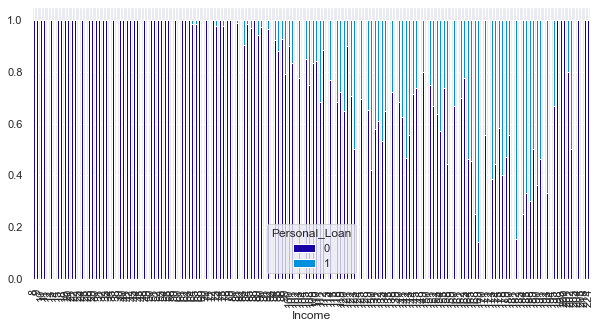

In [65]:
stacked_plot(df['Income'])

Personal_Loan     0    1   All
CCAvg                         
0.0             105    1   106
0.1             181    2   183
0.2             196    8   204
0.3             235    6   241
0.4             175    4   179
...             ...  ...   ...
8.9               0    1     1
9.0               0    2     2
9.3               0    1     1
10.0              0    3     3
All            4520  480  5000

[109 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


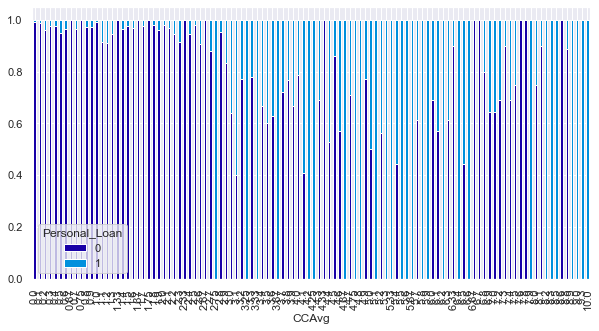

In [66]:
stacked_plot(df['CCAvg'])

## Multi-variate Analysis

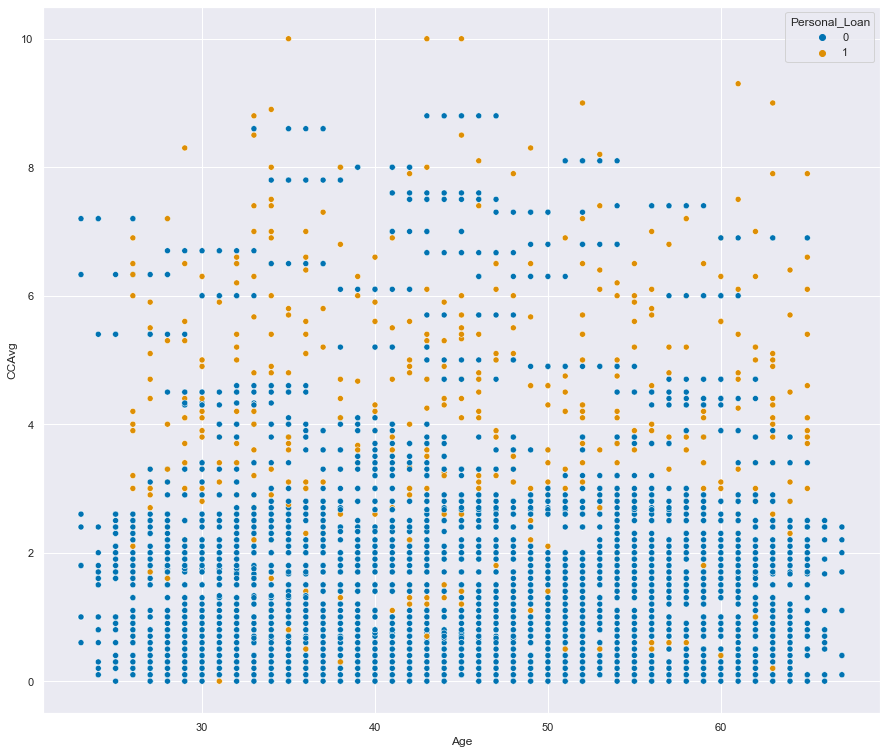

In [67]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='CCAvg', x='Age', hue='Personal_Loan', data=df, palette ='colorblind');

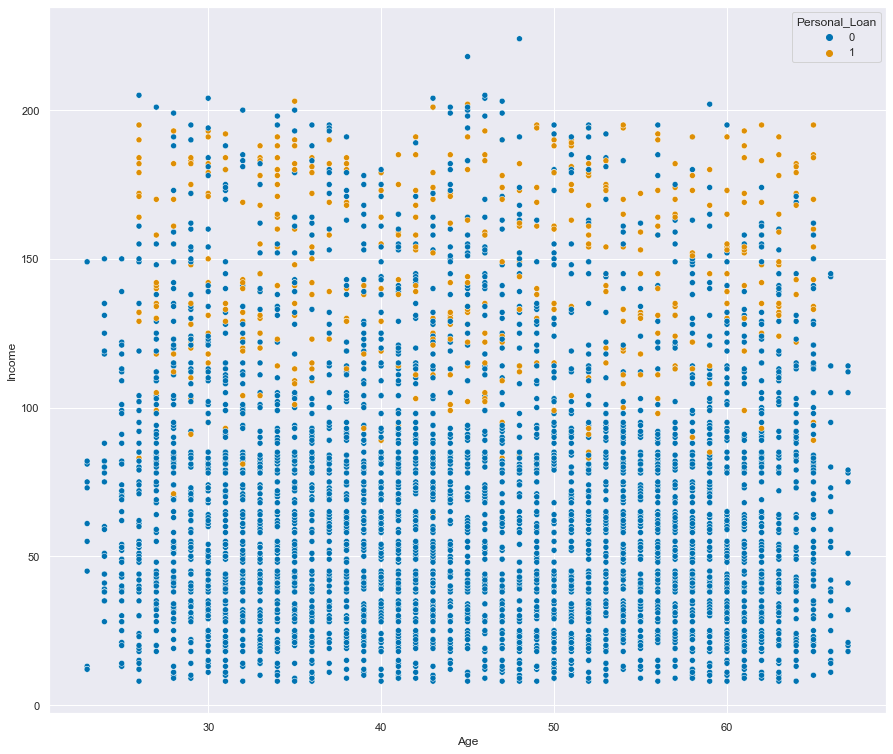

In [68]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Income', x='Age', hue='Personal_Loan', data=df, palette ='colorblind');

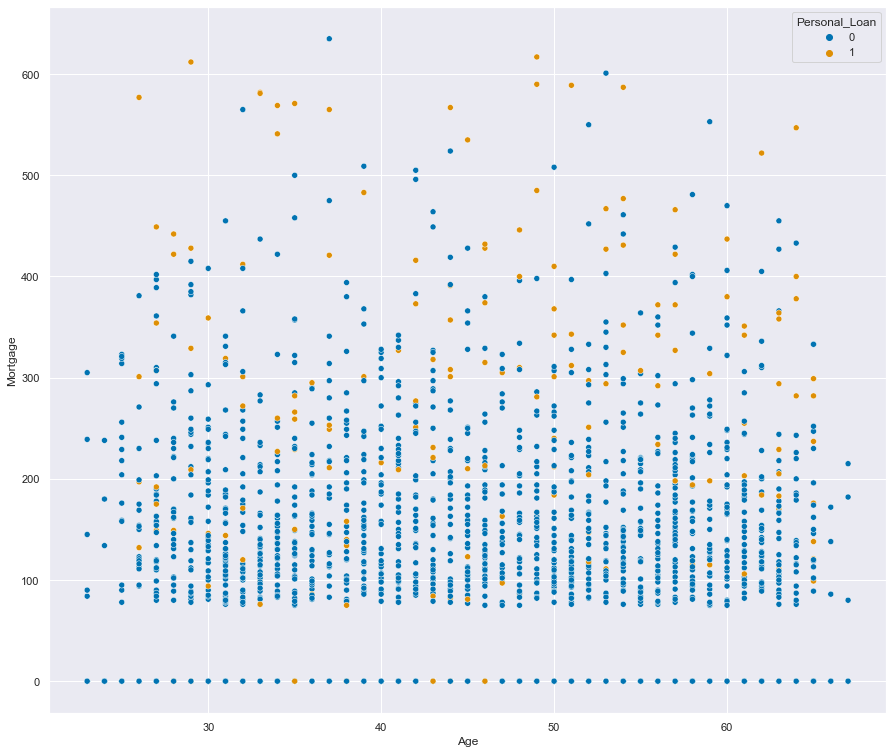

In [69]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Mortgage', x='Age', hue='Personal_Loan', data=df, palette ='colorblind');

In [70]:
#sns.catplot(x="Family", y="CCAvg", hue='Personal_Loan', kind="swarm", data=df)

In [71]:
#sns.catplot(x="Family", y="Mortgage" , hue='Personal_Loan', kind="swarm", data=df)

## explore influence of customer Zip Code on Personal Loan Acceptance

In [72]:
# read in the US Zips database for mapping Zip Codes to Geographical Areas

zip_data = pd.read_csv('uszips.csv')
zip_df = zip_data.copy()
zip_df = zip_df.rename(columns={"zip": "ZIPCode"})
zip_df.head()


ZIPCode       lat       lng       city state_id   state_name  zcta  \
0      601  18.18005 -66.75218   Adjuntas       PR  Puerto Rico  True   
1      602  18.36074 -67.17519     Aguada       PR  Puerto Rico  True   
2      603  18.45440 -67.12201  Aguadilla       PR  Puerto Rico  True   
3      606  18.16721 -66.93828    Maricao       PR  Puerto Rico  True   
4      610  18.29032 -67.12244     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     17113.0    102.7        72001    Adjuntas   
1          NaN     37751.0    476.0        72003      Aguada   
2          NaN     47081.0    574.9        72005   Aguadilla   
3          NaN      6392.0     58.3        72093     Maricao   
4          NaN     26686.0    286.9        72011      Añasco   

                                      county_weights  \
0                {"72001": "99.43", "72141": "0.57"}   
1                                   {"72003": "100"}   
2                                   {"72005": "100"}   
3  {"72093": "94.88", "72153": "3.78", "72121": "...   
4                {"72011": "99.45", "72003": "0.55"}   

              county_names_all    county_fips_all  imprecise  military  \
0              Adjuntas|Utuado        72001|72141      False     False   
1                       Aguada              72003      False     False   
2                    Aguadilla              72005      False     False   
3  Maricao|Yauco|Sabana Grande  72093|72153|72121      False     False   
4                Añasco|Aguada        72011|72003      False     False   

              timezone  
0  America/Puerto_Rico  
1  America/Puerto_Rico  
2  America/Puerto_Rico  
3  America/Puerto_Rico  
4  America/Puerto_Rico

In [73]:
#Join key data from df and zip_df for visualization

zip_join = pd.merge(df,
                 zip_df[['ZIPCode', 'lat', 'lng', 'state_name', 'county_name','city']],
                 on='ZIPCode')
zip_join.head()

ID  Age  Experience  Income  ZIPCode Family  CCAvg Education  Mortgage  \
0    1   25           1      49    91107      4    1.6         1         0   
1  456   30           4      60    91107      4    2.2         2         0   
2  460   35          10     200    91107      2    3.0         1       458   
3  576   54          30      93    91107      1    2.7         2         0   
4  955   37          12     169    91107      2    5.2         3       249   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

        lat        lng  state_name  county_name      city  
0  34.15833 -118.08716  California  Los Angeles  Pasadena  
1  34.15833 -118.08716  California  Los Angeles  Pasadena  
2  34.15833 -118.08716  California  Los Angeles  Pasadena  
3  34.15833 -118.08716  California  Los Angeles  Pasadena  
4  34.15833 -118.08716  California  Los Angeles  Pasadena

In [74]:
df['Personal_Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

Personal_Loan       0    1   All
county_name                     
Alameda           445   41   486
Butte               4    0     4
Contra Costa       74   11    85
El Dorado          15    2    17
Fresno             24    2    26
Humboldt           27    2    29
Imperial            3    0     3
Kern               46    3    49
Lake                4    0     4
Los Angeles       897  106  1003
Marin              41    3    44
Mendocino           7    1     8
Merced              4    0     4
Monterey          116   12   128
Napa                3    0     3
Orange            277   29   306
Placer             20    4    24
Riverside          22    2    24
Sacramento        150   17   167
San Benito         13    1    14
San Bernardino     93    4    97
San Diego         377   55   432
San Francisco     187   29   216
San Joaquin        13    0    13
San Luis Obispo     4    0     4
San Mateo         185   19   204
Santa Barbara      70    5    75
Santa Clara       481   45   526
Santa Cruz

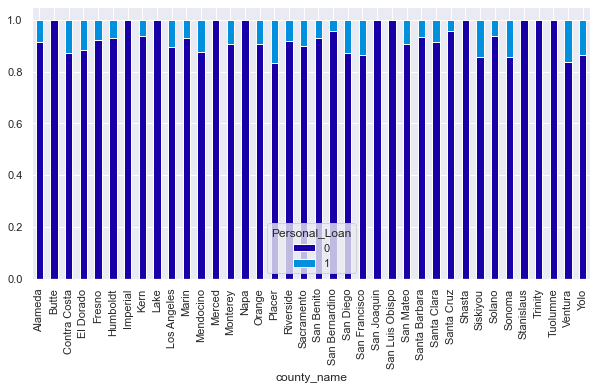

In [75]:
stacked_plot(zip_join['county_name'])

In [76]:
zip_join['county_name']

0        Los Angeles
1        Los Angeles
2        Los Angeles
3        Los Angeles
4        Los Angeles
            ...     
4405     Los Angeles
4406           Marin
4407     Los Angeles
4408       San Mateo
4409    Contra Costa
Name: county_name, Length: 4410, dtype: object

In [77]:
zip_join['county_name'].nunique()

38

In [78]:
zip_join['state_name'].nunique()

1

In [79]:
zip_join ['city'].nunique()

241

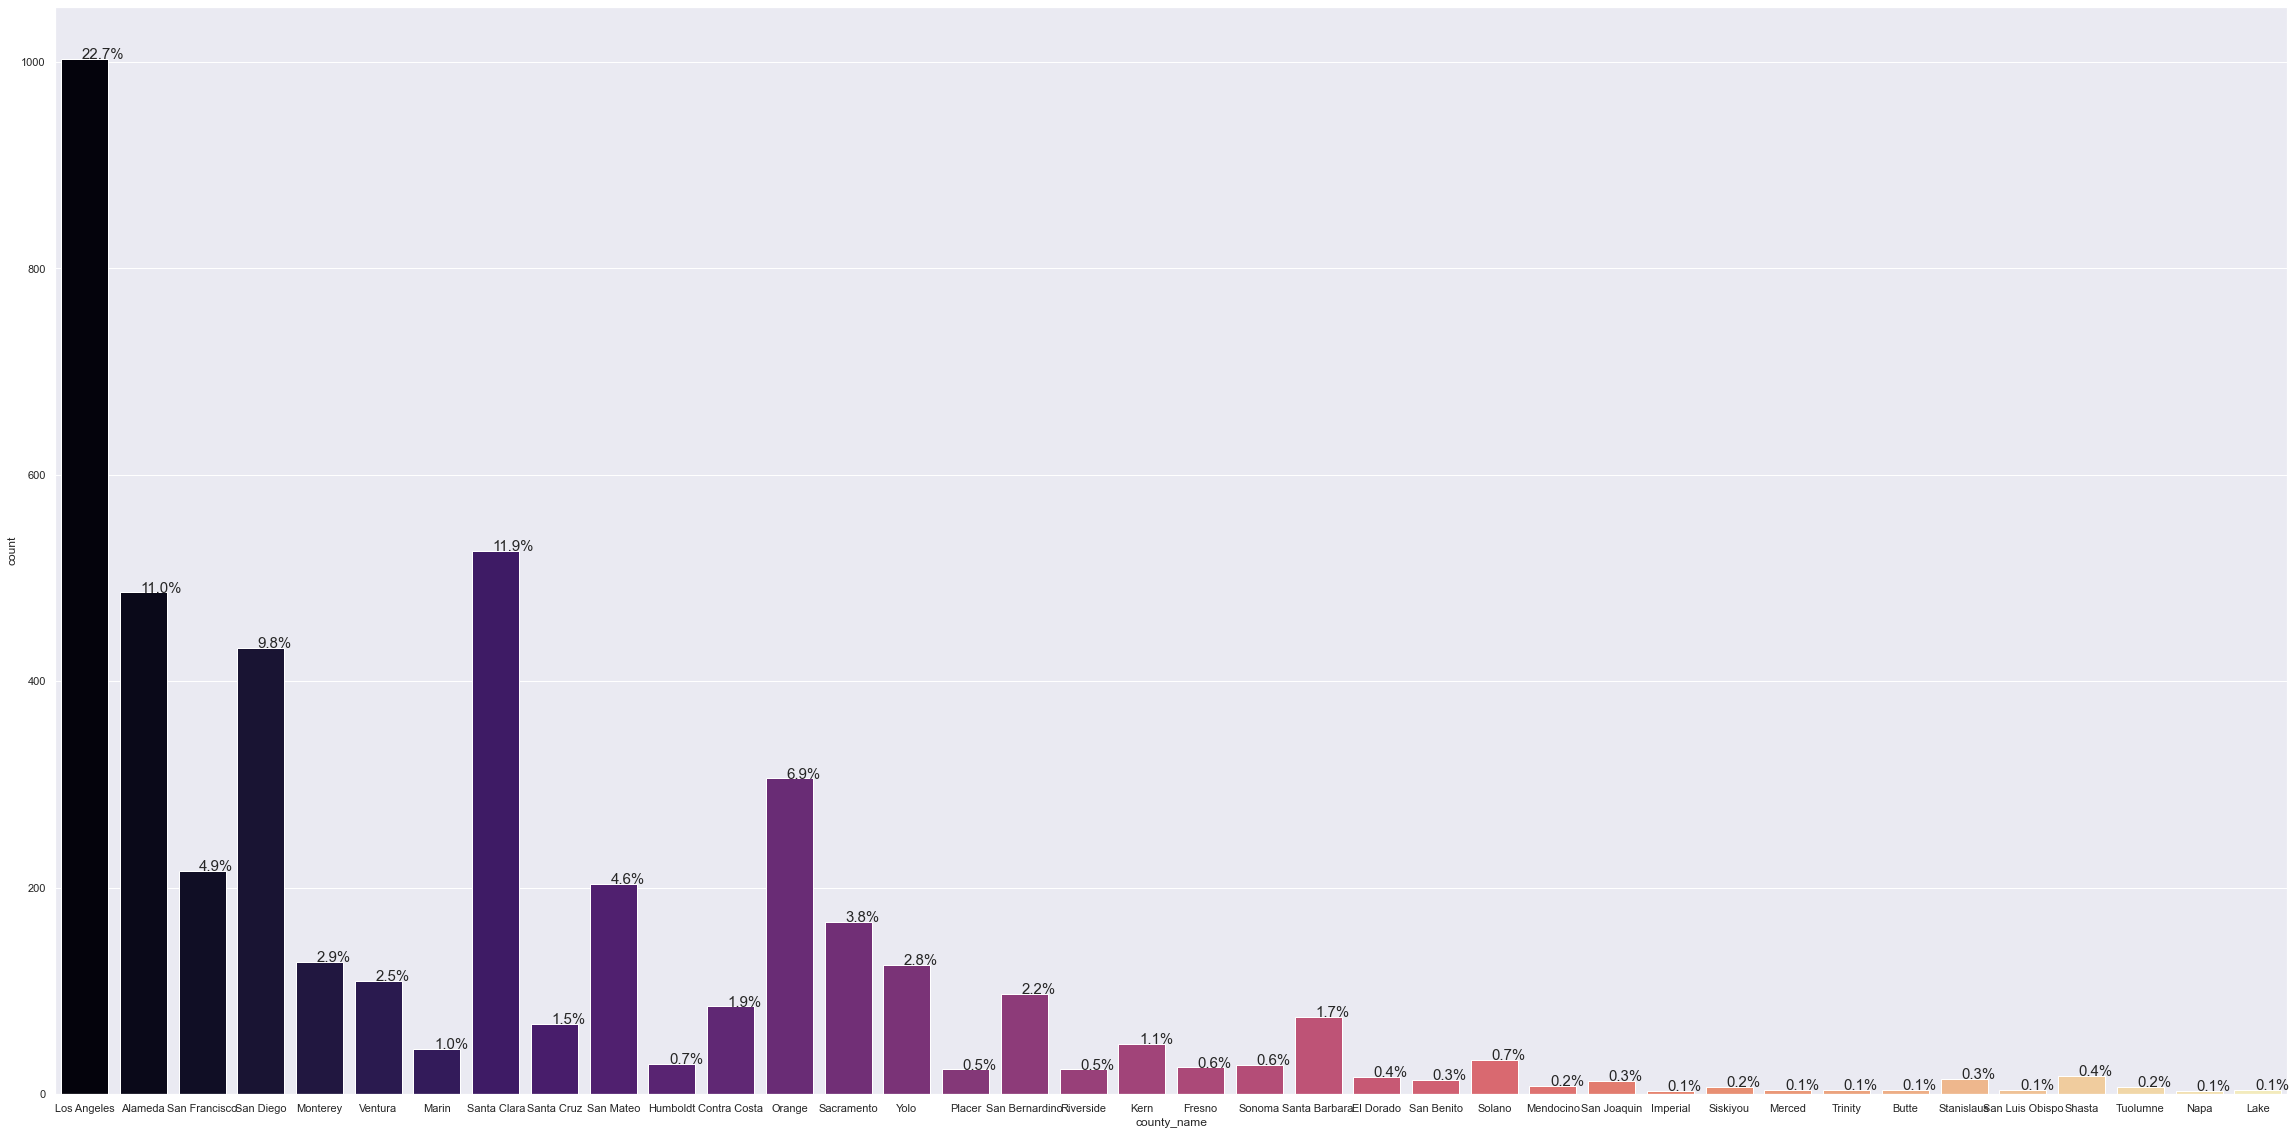

In [80]:
plt.figure(figsize = (40,20))
ax = sns.countplot(zip_join['county_name'], palette = 'magma')
bar_perc (ax,zip_join['county_name'])

In [81]:
#zip_join.plot(kind ='scatter', x = 'lng', y ='lat', alpha = 0.4, s = zip_join["Personal_Loan"], label = "loan acceptance", )

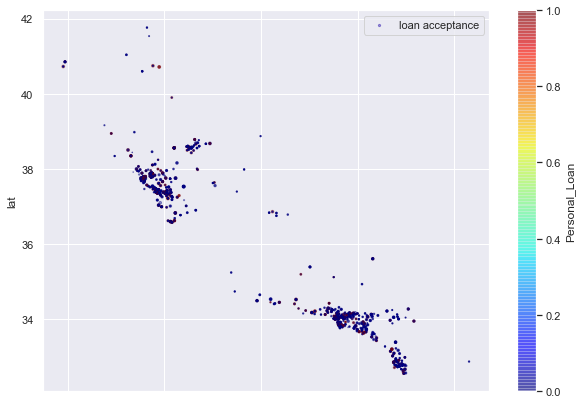

In [82]:
zip_join.plot(kind ='scatter', x = 'lng', y ='lat', alpha = 0.4, s = zip_join["CCAvg"], 
              label = "loan acceptance", figsize = (10,7), c = "Personal_Loan", cmap =plt.get_cmap ("jet"),
             colorbar = True, 
             
             )

plt.legend()



* The data sets shows that all the customers in this dataset are from 1 State.  Aggregating by State will not be helpful. There are 241 unique cities. We can reduce the dimensionality of ZIP_Code by grouping into counties.  However, the data groupings around ZIPCode seem to be evenly divided by latitude 36.  We can split CA into 2 groups, True = norcal for (northern CA) and False = socal for (southern CA).

* Need to clean up the zip_join df and rename for use in model building.



In [83]:
zip_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4410 non-null   int64   
 1   Age                 4410 non-null   int64   
 2   Experience          4410 non-null   int64   
 3   Income              4410 non-null   int64   
 4   ZIPCode             4410 non-null   int64   
 5   Family              4410 non-null   category
 6   CCAvg               4410 non-null   float64 
 7   Education           4410 non-null   category
 8   Mortgage            4410 non-null   int64   
 9   Personal_Loan       4410 non-null   int64   
 10  Securities_Account  4410 non-null   int64   
 11  CD_Account          4410 non-null   int64   
 12  Online              4410 non-null   int64   
 13  CreditCard          4410 non-null   int64   
 14  lat                 4410 non-null   float64 
 15  lng                 4410 non-null   fl

In [84]:
#dropping the columns that we don't need, as well as one of the perfectly correlated independent variables.

cols_to_drop =['ZIPCode', 'lng', 'state_name', 'city', 'Age']
df = zip_join.drop(columns = cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4410 non-null   int64   
 1   Experience          4410 non-null   int64   
 2   Income              4410 non-null   int64   
 3   Family              4410 non-null   category
 4   CCAvg               4410 non-null   float64 
 5   Education           4410 non-null   category
 6   Mortgage            4410 non-null   int64   
 7   Personal_Loan       4410 non-null   int64   
 8   Securities_Account  4410 non-null   int64   
 9   CD_Account          4410 non-null   int64   
 10  Online              4410 non-null   int64   
 11  CreditCard          4410 non-null   int64   
 12  lat                 4410 non-null   float64 
 13  county_name         4410 non-null   object  
dtypes: category(2), float64(2), int64(9), object(1)
memory usage: 616.8+ KB


In [85]:
df.describe (include= 'all').T

count unique          top  freq       mean       std  \
ID                  4410    NaN          NaN   NaN    2499.68   1444.31   
Experience          4410    NaN          NaN   NaN    20.0413     11.47   
Income              4410    NaN          NaN   NaN    73.9406   46.0833   
Family              4410      4            1  1294        NaN       NaN   
CCAvg               4410    NaN          NaN   NaN    1.94296   1.74858   
Education           4410      3            1  1866        NaN       NaN   
Mortgage            4410    NaN          NaN   NaN    56.8261   102.258   
Personal_Loan       4410    NaN          NaN   NaN  0.0941043  0.292007   
Securities_Account  4410    NaN          NaN   NaN   0.102041  0.302736   
CD_Account          4410    NaN          NaN   NaN  0.0605442  0.238519   
Online              4410    NaN          NaN   NaN   0.594331  0.491077   
CreditCard          4410    NaN          NaN   NaN   0.296145  0.456608   
lat                 4410    NaN          NaN   NaN    35.9023   2.08036   
county_name         4410     38  Los Angeles  1003        NaN       NaN   

                       min      25%      50%      75%    max  
ID                       1  1259.25   2490.5  3748.75   5000  
Experience              -3       10       20       30     43  
Income                   8       39       64       98    224  
Family                 NaN      NaN      NaN      NaN    NaN  
CCAvg                    0      0.7      1.5      2.6     10  
Education              NaN      NaN      NaN      NaN    NaN  
Mortgage                 0        0        0      101    635  
Personal_Loan            0        0        0        0      1  
Securities_Account       0        0        0        0      1  
CD_Account               0        0        0        0      1  
Online                   0        0        1        1      1  
CreditCard               0        0        0        1      1  
lat                 32.554  34.0244  36.7696  37.7573  41.76  
county_name            NaN      NaN      NaN      NaN    NaN

In [86]:
df['mapped'] = np.where(df['lat'] > 36, True, False)
df['mapped'].head()

0    False
1    False
2    False
3    False
4    False
Name: mapped, dtype: bool

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4410 non-null   int64   
 1   Experience          4410 non-null   int64   
 2   Income              4410 non-null   int64   
 3   Family              4410 non-null   category
 4   CCAvg               4410 non-null   float64 
 5   Education           4410 non-null   category
 6   Mortgage            4410 non-null   int64   
 7   Personal_Loan       4410 non-null   int64   
 8   Securities_Account  4410 non-null   int64   
 9   CD_Account          4410 non-null   int64   
 10  Online              4410 non-null   int64   
 11  CreditCard          4410 non-null   int64   
 12  lat                 4410 non-null   float64 
 13  county_name         4410 non-null   object  
 14  mapped              4410 non-null   bool    
dtypes: bool(1), category(2), float64(2), i

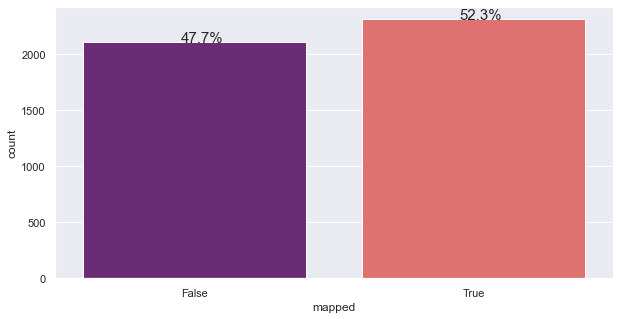

In [88]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['mapped'], palette = 'magma')
bar_perc (ax,df['mapped'])

In [89]:
cols_to_drop_2 =['lat', 'county_name']
df = df.drop(columns = cols_to_drop_2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4410 non-null   int64   
 1   Experience          4410 non-null   int64   
 2   Income              4410 non-null   int64   
 3   Family              4410 non-null   category
 4   CCAvg               4410 non-null   float64 
 5   Education           4410 non-null   category
 6   Mortgage            4410 non-null   int64   
 7   Personal_Loan       4410 non-null   int64   
 8   Securities_Account  4410 non-null   int64   
 9   CD_Account          4410 non-null   int64   
 10  Online              4410 non-null   int64   
 11  CreditCard          4410 non-null   int64   
 12  mapped              4410 non-null   bool    
dtypes: bool(1), category(2), float64(1), int64(9)
memory usage: 552.2 KB


## 2. Insights based on EDA



There are 5,000 customers in the data set.

Customers are average 45.3 years old with the youngest customer being 23 yrs and the oldest customer being 67 yrs.  50% of the customers are between 35yrs to 55 yrs old.

These customers range in experience between 0 yrs to 43 yrs experience with an average experience of 20.1 yrs.  50% of the customers have between 10 yrs to 30 yrs.

Customers have an average income of $73,800 er year.  They range from $8,000 to $224,000 per year and half the customers make between $39,000 to $98,000 per year.  The data is right skewed (i.e., toward a higher income).

Customers all come from California and are evenly split between northern and Southern California Zip Codes.  A maximum of 3.8% of customers come from Berkeley, CA.  50% of the customers come from Zip Codes representing 0.08% - 0.24% of customers per Zip Code.

Customers are predominantly 1 person per family ( or no spouse / partner or children), follow by 2, 4, 3 people respectively.  Comparably split in % of total customers.

The average amount of money customers spend on credit cards monthly ranges from $0 to $10,000 with an average of $1,937.  50% of customers spend between $700 to $2,500 per month.

The educational background of customers varies.  41.9% of customers had at least an undergraduate degree with 28.1 % having a graduate degree, and 30% of customers having an advanced/professional level of education.

Customers carried between no mortgage and up to $635K with an average of $56.5K (50% of customers had between $0 and $101K in a mortgage).

The target level Personal Loans had a 9.6% acceptance rate.

89.6 of customers did not have a Securities Account.  94% did not have a CD Account.  70.6% did not have a Credit Card with AllLife Bank (*note : referred to as Universal Bank in the Data Dictionary).  59.7% of customers banked on-line.


Age and Experience are perfectly correlated.  

Customers spend more proportionally to an increase in income and are more likely to buy a Personal Loan product above income in $100K per year.


## focus on Personal Loan Acceptance:


1.  Customers with a graduate or advanced profession were 4X more likely to buy a Personal Loan Product (evenly split between the two).

2. Family sizes of 3 -4 people were more likely to purchase a Personal Loan Product.

3. One half of the customers with a CD account bought a Personal Loan Product.


# 3.  Data Pre-processing 

*  Preparing the data for analysis

*  Missing value treatment, outlier detection/treatment, feature engineering, data prep, model split


## Check for obscure "missing" values or data defects.  Namely, 0's in columns where there shouldn't be 0's

* I checked earlier an there were no NULL Values or obviously missing data.
* Which columns should not have 0's however, i.e., should be non-zero numbers?

-- ID Income, Family, Education





In [90]:
df.isna().sum()

ID                    0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
mapped                0
dtype: int64

In [91]:
# checking to see if there are any columns that have zeroes which should not be there
(df == 0).sum()

ID                       0
Experience              54
Income                   0
Family                   0
CCAvg                   88
Education                0
Mortgage              3052
Personal_Loan         3995
Securities_Account    3960
CD_Account            4143
Online                1789
CreditCard            3104
mapped                2103
dtype: int64

In [92]:
# do not need this snipet
# there are not any columns that have zero values that shouldn't

#from sklearn.impute import SimpleImputer
#rep_0 = SimpleImputer(missing_values=0, strategy="mean")
#cols=['ID','Age','Income','Family','Education']
#imputer = rep_0.fit(df[cols])
#df[cols] = imputer.transform(df1[cols])

#df1.head(10)



In [93]:
# test the effectiveness of the SimpleImputer

#sample_0 = df['ID'].isin(['0']).sum(axis=0)
#sample_1 = df['Age'].isin(['0']).sum(axis=0)
#sample_2 = df['Income'].isin(['0']).sum(axis=0)
#sample_3 = df['Family'].isin(['0']).sum(axis=0)
#sample_4 = df['Education'].isin(['0']).sum(axis=0)

#print(sample_0, sample_1, sample_2, sample_3, sample_4)

## address outliers

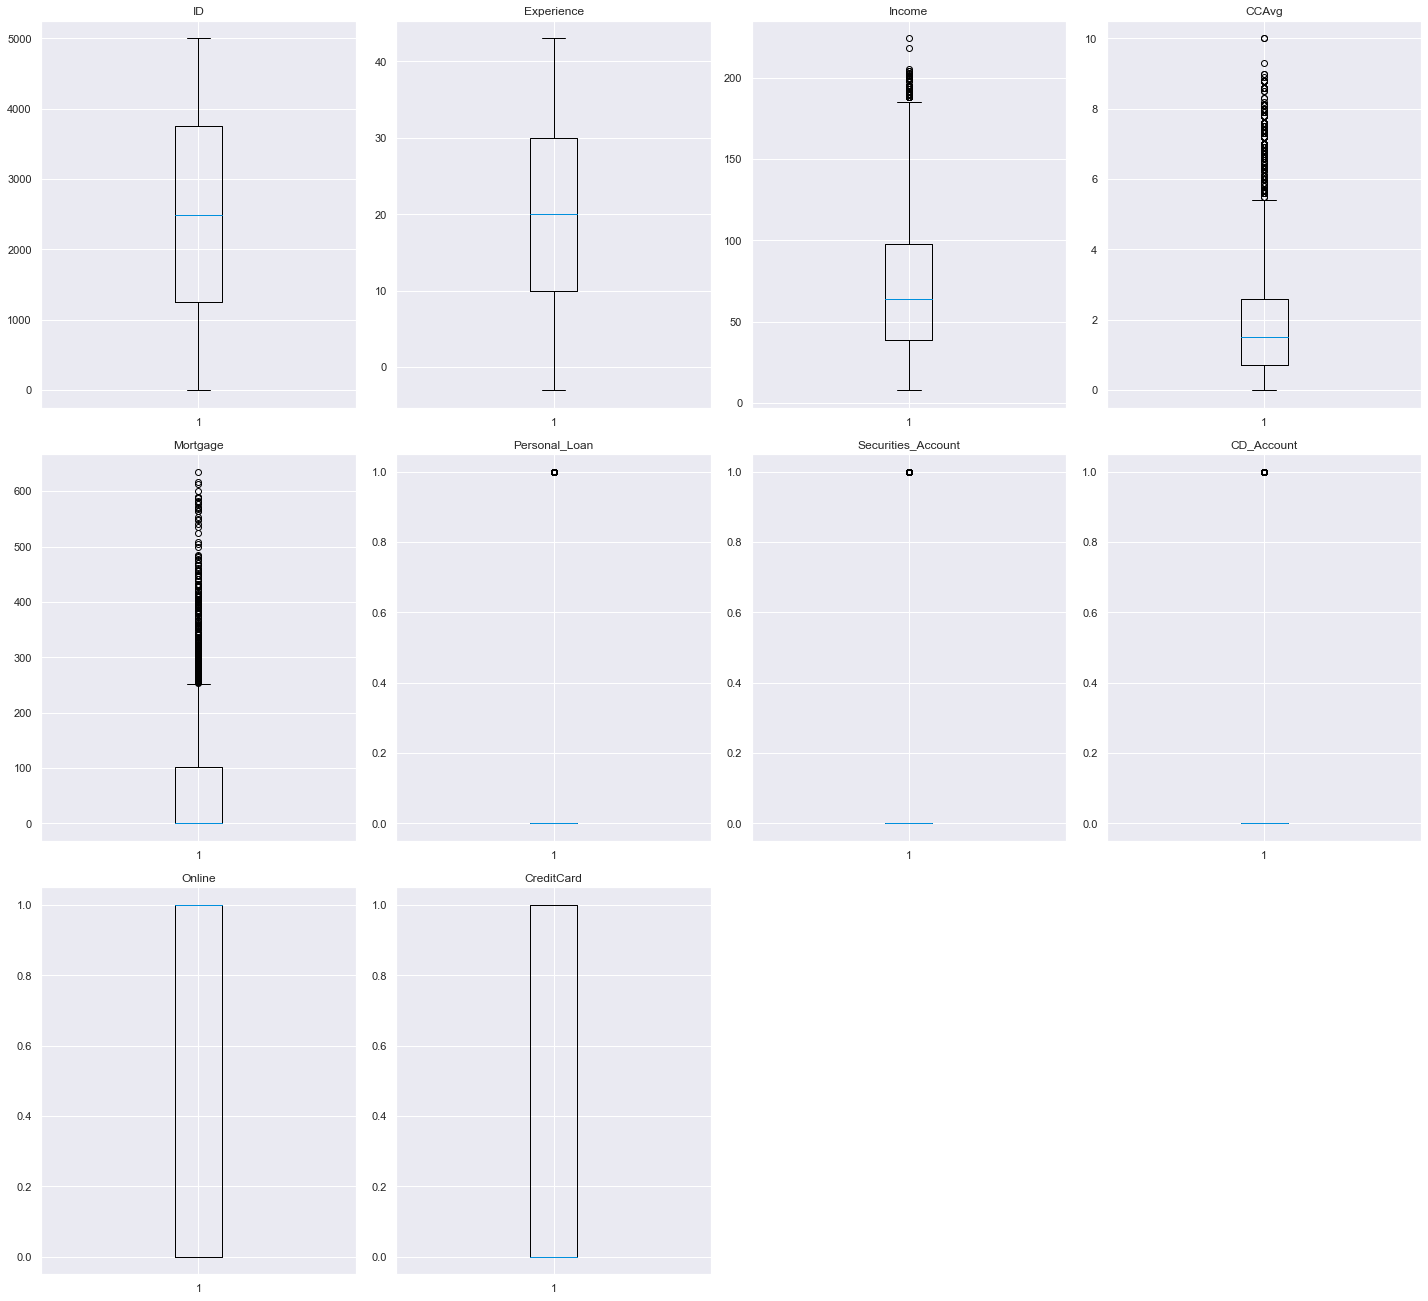

In [94]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [95]:

#Flooring and capping method for Outlier Treatment


col_list = ['Income', 'Mortgage', 'CCAvg']


def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df


def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of specific numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df




In [96]:
numerical_col = ['Income', 'Mortgage', 'CCAvg']
df = treat_outliers_all(df,numerical_col)

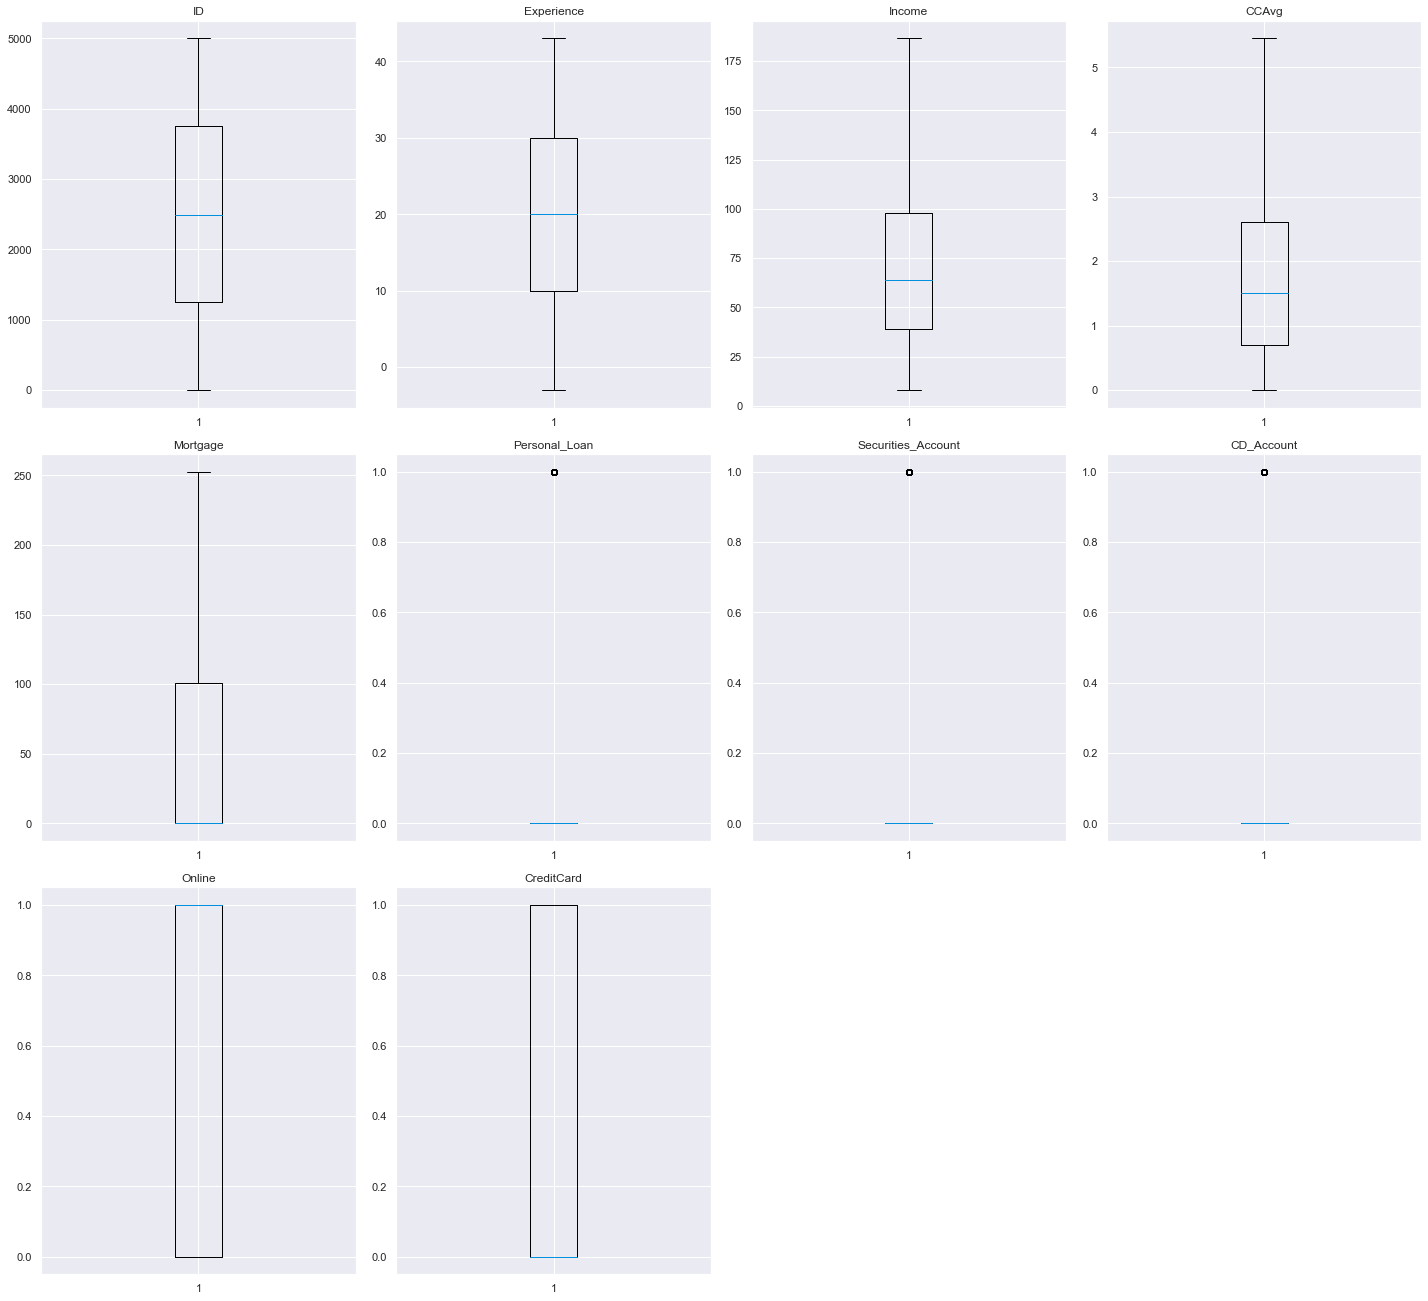

In [97]:
# plot to confirm outliers have been treated
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### need to correct negative Experience values

fixing values that are not feasible, such as negative Experience.  Note that that there is at least one entry showing -3 for experience and there are other negative numbers that need to be replaced.  I will fix that one and any other negative numbers, and then  replace with the absolute value of the number.  I am assuming that the number was key-entered as a negative number by mistake and we should preserve magnitude.



In [98]:
df['Experience'] = df['Experience'].apply(lambda x : x if x > 0 else abs(x))


In [99]:
exp_negs = df['Experience'].isin([-2]).sum(axis=0)
exp_negs

0

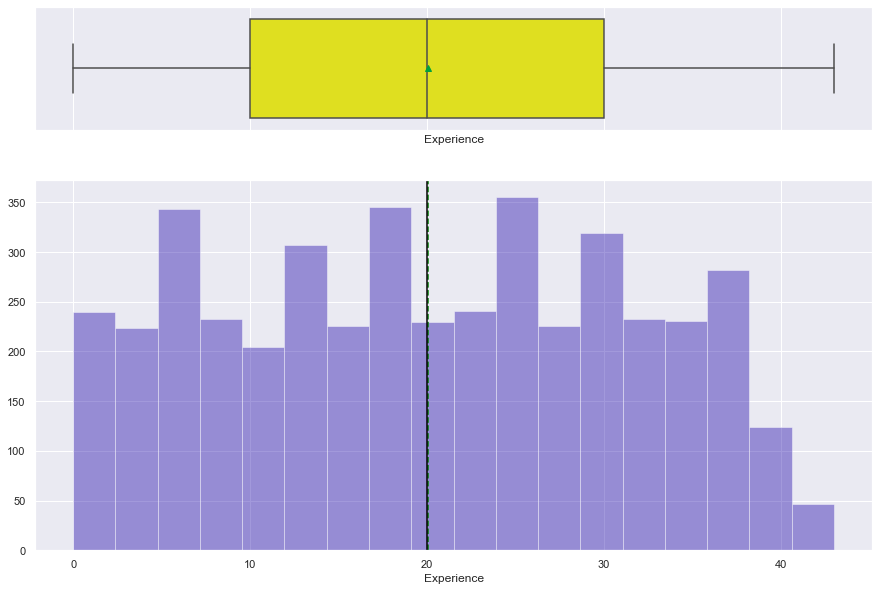

In [100]:
histogram_boxplot(df.Experience)

* the negative numbers for Experience have been corrected

## one-hot encoding the categorical variables

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4410 non-null   int64   
 1   Experience          4410 non-null   int64   
 2   Income              4410 non-null   float64 
 3   Family              4410 non-null   category
 4   CCAvg               4410 non-null   float64 
 5   Education           4410 non-null   category
 6   Mortgage            4410 non-null   float64 
 7   Personal_Loan       4410 non-null   int64   
 8   Securities_Account  4410 non-null   int64   
 9   CD_Account          4410 non-null   int64   
 10  Online              4410 non-null   int64   
 11  CreditCard          4410 non-null   int64   
 12  mapped              4410 non-null   bool    
dtypes: bool(1), category(2), float64(3), int64(7)
memory usage: 552.2 KB


In [102]:
# need to one-hote encode Categorical and Boolean columns

dummy_data = pd.get_dummies(df, columns=['Family', 'Education','mapped'],drop_first=True)
dummy_data.head()

ID  Experience  Income  CCAvg  Mortgage  Personal_Loan  \
0    1           1    49.0    1.6       0.0              0   
1  456           4    60.0    2.2       0.0              0   
2  460          10   186.5    3.0     252.5              0   
3  576          30    93.0    2.7       0.0              0   
4  955          12   169.0    5.2     249.0              1   

   Securities_Account  CD_Account  Online  CreditCard  Family_2  Family_3  \
0                   1           0       0           0         0         0   
1                   0           0       1           0         0         0   
2                   0           0       0           0         1         0   
3                   0           0       1           0         0         0   
4                   0           0       1           0         1         0   

   Family_4  Education_2  Education_3  mapped_True  
0         1            0            0            0  
1         1            1            0            0  
2         0            0            0            0  
3         0            1            0            0  
4         0            0            1            0

In [103]:
df = dummy_data.copy()
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4410 non-null   int64  
 1   Experience          4410 non-null   int64  
 2   Income              4410 non-null   float64
 3   CCAvg               4410 non-null   float64
 4   Mortgage            4410 non-null   float64
 5   Personal_Loan       4410 non-null   int64  
 6   Securities_Account  4410 non-null   int64  
 7   CD_Account          4410 non-null   int64  
 8   Online              4410 non-null   int64  
 9   CreditCard          4410 non-null   int64  
 10  Family_2            4410 non-null   uint8  
 11  Family_3            4410 non-null   uint8  
 12  Family_4            4410 non-null   uint8  
 13  Education_2         4410 non-null   uint8  
 14  Education_3         4410 non-null   uint8  
 15  mapped_True         4410 non-null   uint8  
dtypes: flo

In [104]:
df.head()

ID  Experience  Income  CCAvg  Mortgage  Personal_Loan  \
0    1           1    49.0    1.6       0.0              0   
1  456           4    60.0    2.2       0.0              0   
2  460          10   186.5    3.0     252.5              0   
3  576          30    93.0    2.7       0.0              0   
4  955          12   169.0    5.2     249.0              1   

   Securities_Account  CD_Account  Online  CreditCard  Family_2  Family_3  \
0                   1           0       0           0         0         0   
1                   0           0       1           0         0         0   
2                   0           0       0           0         1         0   
3                   0           0       1           0         0         0   
4                   0           0       1           0         1         0   

   Family_4  Education_2  Education_3  mapped_True  
0         1            0            0            0  
1         1            1            0            0  
2         0            0            0            0  
3         0            1            0            0  
4         0            0            1            0

In [105]:
df.isna().sum()

ID                    0
Experience            0
Income                0
CCAvg                 0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Family_2              0
Family_3              0
Family_4              0
Education_2           0
Education_3           0
mapped_True           0
dtype: int64

## 4. Model Building - LOGISTIC REGRESSION

* Our goal is to:
    
To predict whether a liability customer will buy a personal loan or not.

* Model Evaluation Criterion  : PRECISION METRICS

What is the risk of loss to AllLifeBank if we incorrectly classify whether a liability customer will buy a personal loan or not?


-- There are 2 possible types of losses : 

* We could inform the marketing campaign that a particular class of customer will buy a loan when in fact they will not buy a personal loan.

* We may fail to inform the marketing campaign that a particular class of customer will buy a personal loan, and these customers would have indeed bought a personal loan.


POSITIVE = will buy


NEGATIVE = will not buy



* Which loss is greater?

1.  If we inform AllLife to target a specific customer who never intended to buy, they waste their time and marketing campaign resources.  However, there is no loss of revenue.  (FP)

2.  If we fail to inform AllLife to target a specific customer class who would have bought, we are not wasting their time, but we are missing potential revenue.  This is a greater loss.  (FN)


To minimize the impact of FN's, we will work to maximize RECALL.  








In [106]:
df['Personal_Loan'].describe()

count    4410.000000
mean        0.094104
std         0.292007
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

## Split the Data into Training and Test Sets

In [107]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan',axis=1)     # Predictor feature columns
Y = df['Personal_Loan']   # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=29)
# using 29 as the random seed

X_train.head()


ID  Experience  Income  CCAvg  Mortgage  Securities_Account  \
4037  2683          27    81.0    2.6       0.0                   0   
592   1889          10    93.0    2.8       0.0                   0   
2986   371          12    25.0    1.0     147.0                   0   
1077  1911          18    83.0    3.8     112.0                   0   
1141  4574          20    73.0    0.8     252.5                   0   

      CD_Account  Online  CreditCard  Family_2  Family_3  Family_4  \
4037           0       1           0         0         0         1   
592            0       1           0         0         0         0   
2986           0       0           0         0         0         1   
1077           0       0           0         1         0         0   
1141           1       1           1         1         0         0   

      Education_2  Education_3  mapped_True  
4037            0            1            0  
592             0            1            1  
2986            0            0            0  
1077            0            1            1  
1141            0            1            1

In [108]:
df['Personal_Loan'].describe()

count    4410.000000
mean        0.094104
std         0.292007
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

### check the split of the training and test data

In [109]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### check true : false ratio for Personal_Loans (i.e., 0=false "did not accept a loan", 1 = true "did accept a loan")

In [110]:
print("Original Personal_Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Original Personal_Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal_Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal_Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal_Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal_Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal_Loan True Values    : 415 (9.41%)
Original Personal_Loan False Values   : 3995 (90.59%)

Training Personal_Loan True Values    : 297 (9.62%)
Training Personal_Loan False Values   : 2790 (90.38%)

Test Personal_Loan True Values        : 118 (8.92%)
Test Personal_Loan False Values       : 1205 (91.08%)



## Logistic Regression

In [111]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 89 )
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit( y_train, X_train )

lg = logit.fit()

print(lg.summary2())

# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))


Optimization terminated successfully.
         Current function value: 0.101885
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.672      
Dependent Variable:   Personal_Loan     AIC:               661.0381   
Date:                 2021-04-13 23:28  BIC:               757.5974   
No. Observations:     3087              Log-Likelihood:    -314.52    
Df Model:             15                LL-Null:           -959.53    
Df Residuals:         3071              LLR p-value:       7.3815e-266
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.0427   0.8656 -16.2230 0.0000 -15.7393 -12.3462
ID

Given the number of people who will actually buy a personal loan product, how many will this model identify?

The higher the better.  

71.6% and 74.6% of the True Positives are explained by the model in the training and the test dataset.



## Check for and treat multi-colinearity

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 19.446838
ID                     1.005838
Experience             1.010007
Income                 1.885885
CCAvg                  1.775658
Mortgage               1.024410
Securities_Account     1.154026
CD_Account             1.327004
Online                 1.042117
CreditCard             1.099412
Family_2               1.404100
Family_3               1.395916
Family_4               1.424589
Education_2            1.281343
Education_3            1.249581
mapped_True            1.005301
dtype: float64



* There are no VIF values > 5.0, therefore we can assume that we do not have any effects due to multicolinearity.

* Note that had we left the perfectly correlated Age and Experience in the model, they would have had a very high VIF score.

## The following variables appear to be insignificant based on the p-value (i.e., > 0.05).   We will drop the one-by-one and look at what happens to recall.

* Family_2 (0.3016)
* Age (0.2634)
* mapped_True (0.2213)
* ID (0.1754)



In [113]:
#Family_2 has highest p value among those with p-value greater than 0.05
X_train1 = X_train.drop('Family_2', axis =1)
X_test1 = X_test.drop('Family_2',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance

y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.102058
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.672      
Dependent Variable:   Personal_Loan     AIC:               660.1078   
Date:                 2021-04-13 23:29  BIC:               750.6321   
No. Observations:     3087              Log-Likelihood:    -315.05    
Df Model:             14                LL-Null:           -959.53    
Df Residuals:         3072              LLR p-value:       1.2822e-266
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.1428   0.8619 -16.4094 0.0000 -15.8320 -12.4535
ID

* The Recall on the training data declined but our test data Recall improved.  Drop the next insignficant variable.

In [114]:
#Mortgage has next highest p values among those with p-value greater than 0.05
X_train2 = X_train1.drop(['Mortgage'], axis =1)
X_test2 = X_test1.drop(['Mortgage'],axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.102238
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.671      
Dependent Variable:   Personal_Loan     AIC:               659.2198   
Date:                 2021-04-13 23:29  BIC:               743.7091   
No. Observations:     3087              Log-Likelihood:    -315.61    
Df Model:             13                LL-Null:           -959.53    
Df Residuals:         3073              LLR p-value:       2.1904e-267
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.0160   0.8486 -16.5166 0.0000 -15.6792 -12.3528
ID

* The Recall on the training data declined but our test data Recall improved.  Drop the next insignficant variable.

In [115]:
#mapped_True has the next highest p values among those with p-value greater than 0.05
X_train3 = X_train2.drop('mapped_True', axis =1)
X_test3 = X_test2.drop('mapped_True',axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.102504
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.670      
Dependent Variable:   Personal_Loan     AIC:               658.8573   
Date:                 2021-04-13 23:29  BIC:               737.3117   
No. Observations:     3087              Log-Likelihood:    -316.43    
Df Model:             12                LL-Null:           -959.53    
Df Residuals:         3074              LLR p-value:       4.6625e-268
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.1283   0.8453 -16.7145 0.0000 -15.7850 -12.4716
ID

* The Recall on the training data s but our test data Recall improved.  Drop the next insignficant variable.

In [116]:
# ID has the next highest p values among those with p-value greater than 0.05
X_train4 = X_train3.drop('ID', axis =1)
X_test4 = X_test3.drop('ID',axis =1)

logit4 = sm.Logit(y_train, X_train4 )
lg4 = logit4.fit()
print(lg4.summary2())

# Let's Look at Model Performance
y_pred = lg4.predict(X_train4) 
pred_train = list(map(round, y_pred))

y_pred1 = lg4.predict(X_test4) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.102771
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.669      
Dependent Variable:   Personal_Loan     AIC:               658.5054   
Date:                 2021-04-13 23:29  BIC:               730.9249   
No. Observations:     3087              Log-Likelihood:    -317.25    
Df Model:             11                LL-Null:           -959.53    
Df Residuals:         3075              LLR p-value:       9.5465e-269
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.3319   0.8333 -17.1996 0.0000 -15.9651 -12.6987
Ex

* The recall on the train and test data sets have oscillated with each variable we drop, but are close. 

* The best pair of train and test recall values was lg1, but the the values remain close and lg4 actually finishes the drop of all the features with p values > 0.05, therefore we will test performance with lg4.

# 5.  Model Performance

In [119]:
#Model performance with optimal threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9659863945578231
Accuracy on test data: 0.9667422524565382
Recall on train data: 0.7058823529411765
Recall on test data: 0.746031746031746
Precision on train data: 0.9107142857142857
Precision on test data: 0.8867924528301887
f1 score on train data: 0.7953216374269007
f1 score on test data: 0.8103448275862069


### Trying to improve the Recall by using the AUC ROC curve

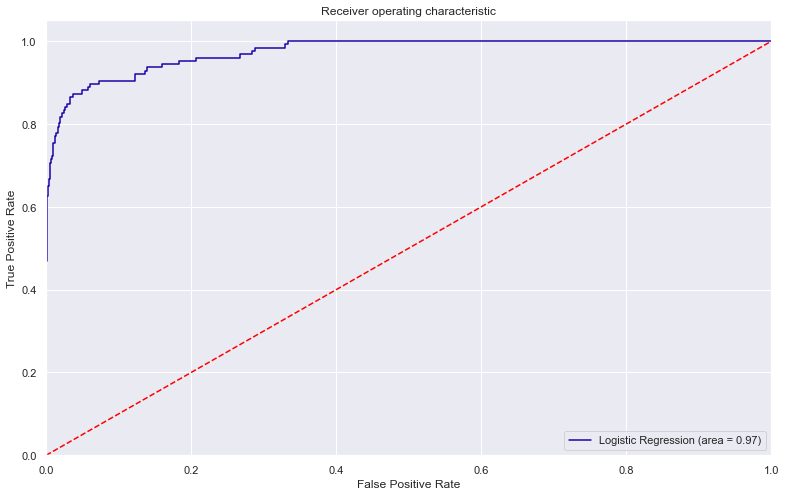

In [120]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.21857912702940221


In [122]:
# Model prediction with optimal threshold
pred_train_opt1 = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt1 = (lg.predict(X_test)>optimal_threshold).astype(int)

In [123]:
#Model performance with optimal threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt1) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt1))

print('Recall on train data:',recall_score(y_train, pred_train_opt1))
print('Recall on test data:',recall_score(y_test, pred_test_opt1))

print('Precision on train data:',precision_score(y_train, pred_train_opt1) )
print('Precision on test data:',precision_score(y_test, pred_test_opt1))

print('f1 score on train data:',f1_score(y_train, pred_train_opt1))
print('f1 score on test data:',f1_score(y_test, pred_test_opt1))

Accuracy on train data: 0.9501133786848073
Accuracy on test data: 0.9508692365835223
Recall on train data: 0.8235294117647058
Recall on test data: 0.8571428571428571
Precision on train data: 0.6979472140762464
Precision on test data: 0.6967741935483871
f1 score on train data: 0.7555555555555556
f1 score on test data: 0.7686832740213522


* Recall has improved by 0.11.  Significant improvement.

## Precision-Recall to explore improving thresholds

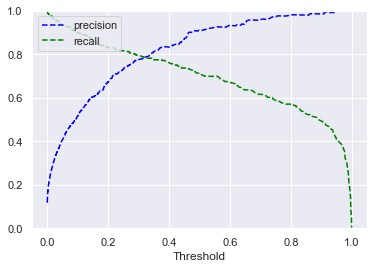

In [124]:
from sklearn.metrics import precision_recall_curve

y_scores=lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Precision degrades rapidly starting at 0.3 threshold

## validating model performance

In [125]:
optimal_threshold = 0.3

# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9601554907677357
Accuracy on test data: 0.9584278155706727
Recall on train data: 0.8027681660899654
Recall on test data: 0.8174603174603174
Precision on train data: 0.7785234899328859
Precision on test data: 0.762962962962963
f1 score on train data: 0.7904599659284496
f1 score on test data: 0.789272030651341


* The Recall did not improve by using Precision - Recall.  The optimal threshold is based on the AUC-ROC Curve.

## Build the CONFUSION MATRIX

In [126]:
from sklearn.metrics import classification_report,confusion_matrix



def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of Personal Loan Acceptance
    y_actual : Actual Personal Loan Acceptance  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True : Personal Loans Accepted')
    plt.xlabel('Predicted: Personal Loans Accepted')

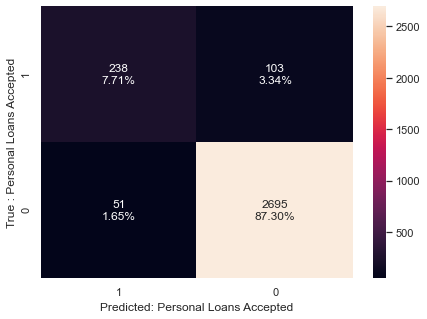

In [127]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train_opt1)

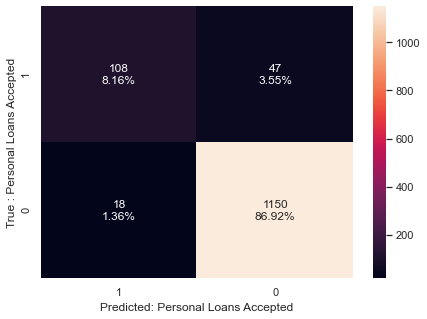

In [128]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test_opt1)

* We built the confusion matrix based on the AUC-ROC threshold.

* Our model performs as follows on test data:

--  TN :  86.92%
-- FN : 3.55%

-- TP :  8.16%
--  FP:  1.36%

* Our objective was to minimize FN.  We wanted to ensure that we produced a model that insulated the customer against a situation where we predicted a customer would not buy, but they actually would purchass a personal loan (i.e., FN).  In this case, 3.55% of customers are predicted to not take a Personal Loan but actually would have bought.



# 6.  Model Building - Decision Tree

In [129]:

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [130]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [131]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [132]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True:  Personal Loan Acceptance')
    plt.xlabel('Predicted : Personal Loan Acceptance')

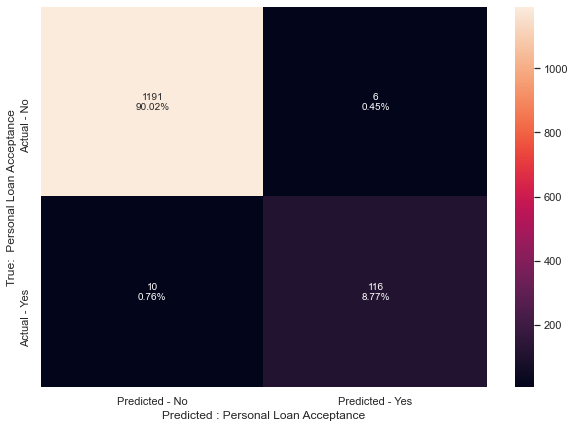

In [133]:
make_confusion_matrix(model,y_test)

* TP rate:  8.77%
* FP rate: 0.76 %
* TN rate: 90.02%
* FN : 0.45 %




In [134]:
y_train.value_counts(1)

0    0.906382
1    0.093618
Name: Personal_Loan, dtype: float64

In [135]:
    pred_test = model.predict(X_test)



## Visualize the Decision Tree

In [136]:
column_names = list(df.columns)
feature_names = column_names
print(feature_names)

['ID', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'mapped_True']


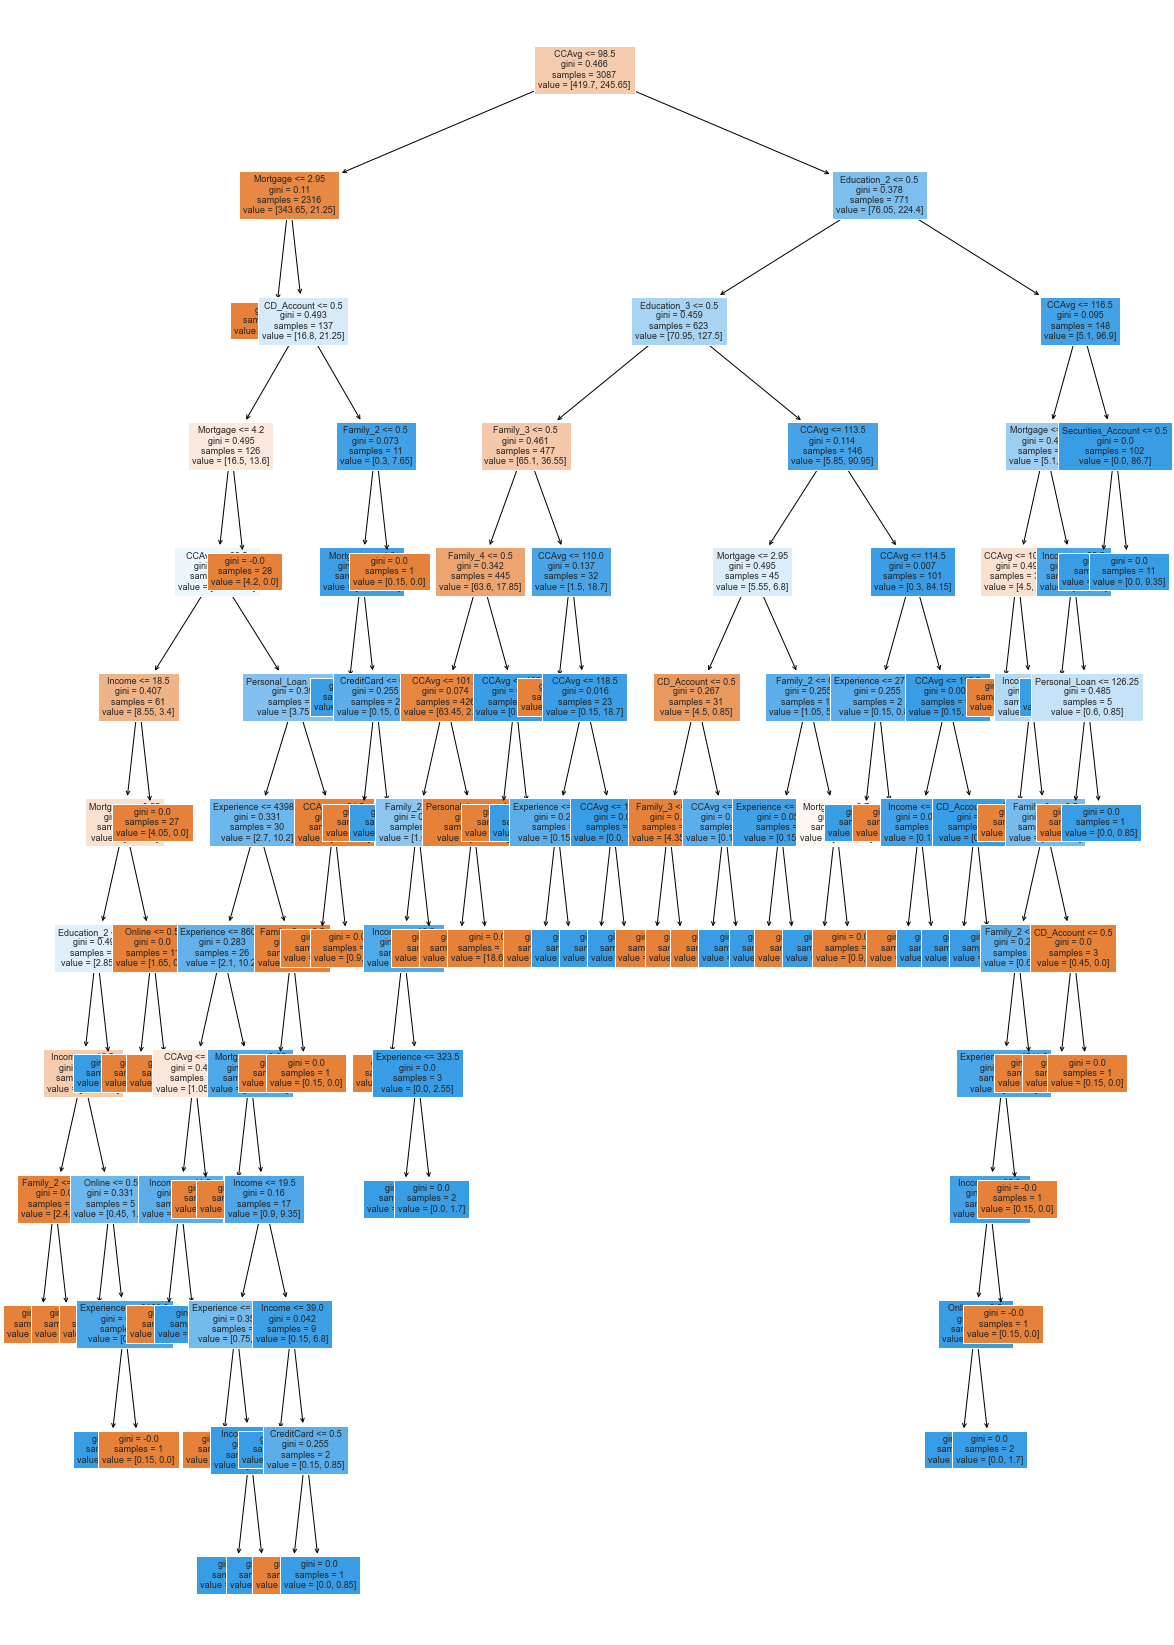

In [137]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [138]:
# Text output for decision tree

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- CCAvg <= 98.50
|   |--- Mortgage <= 2.95
|   |   |--- weights: [326.85, 0.00] class: 0
|   |--- Mortgage >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Mortgage <= 4.20
|   |   |   |   |--- CCAvg <= 82.50
|   |   |   |   |   |--- Income <= 18.50
|   |   |   |   |   |   |--- Mortgage <= 3.55
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- Income <= 16.50
|   |   |   |   |   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Family_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Income >  16.50
|   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Experience <= 3193.00
|   |   |  

In [139]:
#Look at Gini Importance

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income              5.631731e-01
Education_3         1.076417e-01
CCAvg               9.649907e-02
Family_4            7.317028e-02
Family_3            5.403719e-02
Education_2         4.425068e-02
Experience          1.740948e-02
CD_Account          1.436557e-02
ID                  1.272155e-02
Family_2            7.491595e-03
Mortgage            6.187448e-03
CreditCard          1.645639e-03
Online              1.406706e-03
Securities_Account  1.211319e-15
const               0.000000e+00
mapped_True         0.000000e+00


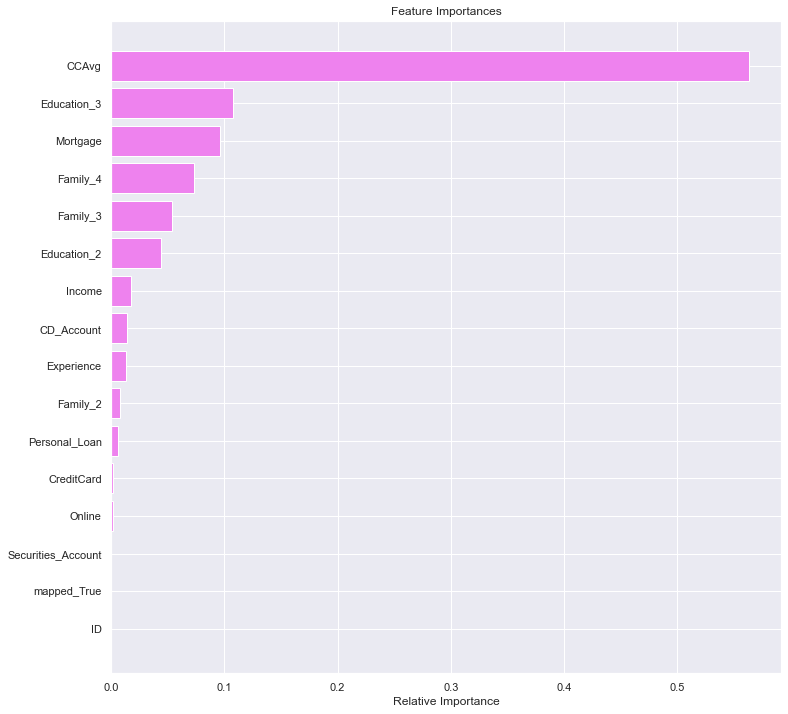

In [140]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* This Decision Tree Model indicates that the CCAvg is the most important feature.  The model is fairly straightforward.



## Reducing Overfitting

* Hyperparameter Tuning using Gridsearch

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=9,
                       max_features='log2', min_impurity_decrease=1e-05,
                       random_state=1, splitter='random')

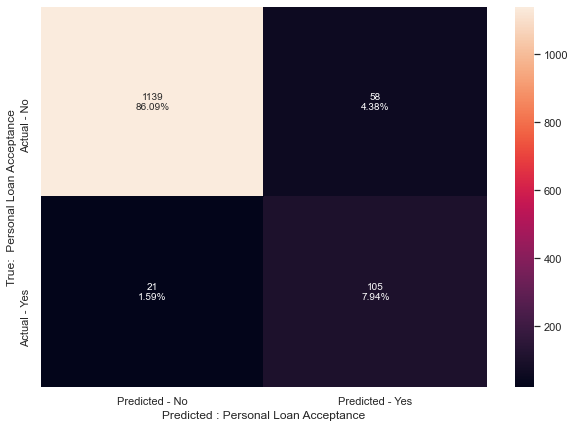

In [143]:
make_confusion_matrix(estimator,y_test)

In [144]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [145]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.9206349206349206


* The model is overfitted.

## Visualize the Decision Tree


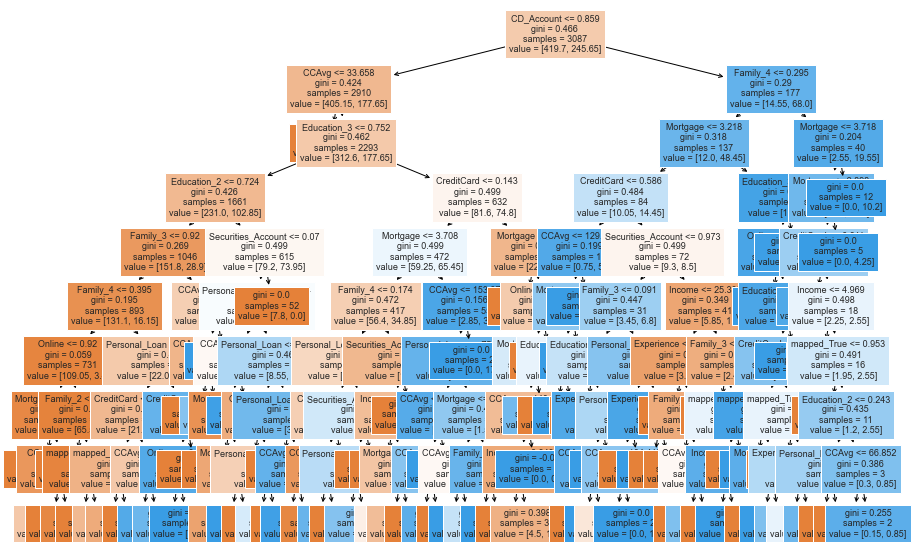

In [146]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [147]:
#Text View

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- CD_Account <= 0.86
|   |--- CCAvg <= 33.66
|   |   |--- weights: [92.55, 0.00] class: 0
|   |--- CCAvg >  33.66
|   |   |--- Education_3 <= 0.75
|   |   |   |--- Education_2 <= 0.72
|   |   |   |   |--- Family_3 <= 0.92
|   |   |   |   |   |--- Family_4 <= 0.40
|   |   |   |   |   |   |--- Online <= 0.92
|   |   |   |   |   |   |   |--- Mortgage <= 3.39
|   |   |   |   |   |   |   |   |--- weights: [28.95, 0.00] class: 0
|   |   |   |   |   |   |   |--- Mortgage >  3.39
|   |   |   |   |   |   |   |   |--- CCAvg <= 124.30
|   |   |   |   |   |   |   |   |   |--- weights: [4.50, 2.55] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  124.30
|   |   |   |   |   |   |   |   |   |--- weights: [10.05, 0.00] class: 0
|   |   |   |   |   |   |--- Online >  0.92
|   |   |   |   |   |   |   |--- Family_2 <= 0.45
|   |   |   |   |   |   |   |   |--- weights: [33.60, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family_2 >  0.45
|   |   |   |   |   |   |   |   |--- mapped_True <= 0.63

In [148]:

# Cite reference:  leveraging some code snipets from our lectures and other case studies

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                         Imp
Income              0.457284
CD_Account          0.159425
CCAvg               0.106760
Education_2         0.079902
Mortgage            0.041179
Education_3         0.028718
Family_4            0.028091
Securities_Account  0.025430
CreditCard          0.023771
Family_3            0.020336
Online              0.017210
mapped_True         0.006234
Experience          0.003730
ID                  0.001839
Family_2            0.000091
const               0.000000


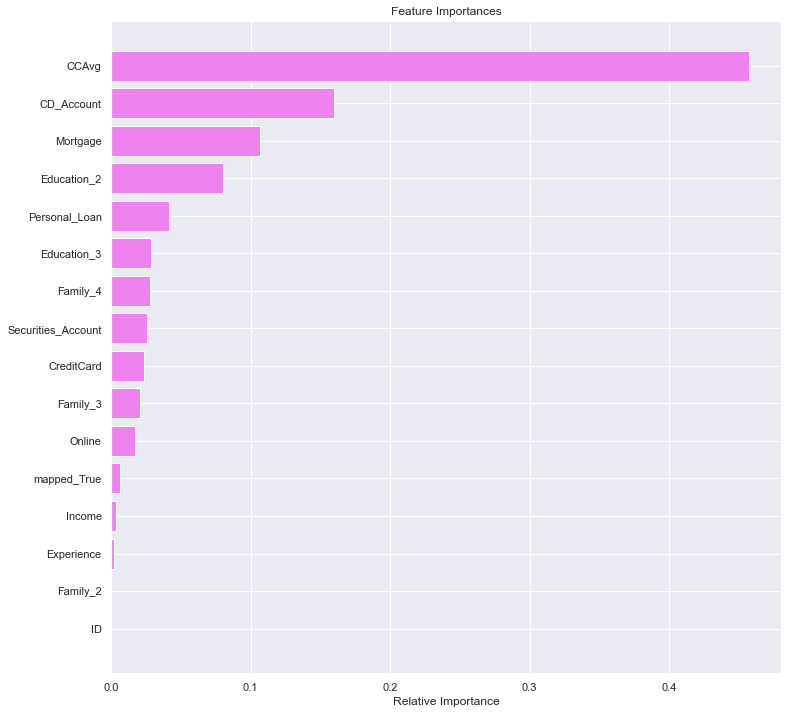

In [149]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Implement Cost Complexity Pruning

In [150]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [151]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -1.093901e-14
1   8.510013e-19 -1.093816e-14
2   8.510013e-19 -1.093731e-14
3   1.601885e-18 -1.093571e-14
4   1.651944e-18 -1.093406e-14
5   1.702003e-18 -1.093236e-14
6   5.306244e-18 -1.092705e-14
7   5.806833e-18 -1.092124e-14
8   8.935514e-18 -1.091231e-14
9   9.285926e-18 -1.090302e-14
10  1.101296e-17 -1.089201e-14
11  5.332942e-17 -1.083868e-14
12  2.707185e-16 -1.056796e-14
13  5.642139e-16 -1.000375e-14
14  2.205795e-04  4.411591e-04
15  2.211098e-04  8.833786e-04
16  2.236513e-04  1.330681e-03
17  2.246444e-04  2.229259e-03
18  3.832569e-04  2.612516e-03
19  3.832569e-04  2.995773e-03
20  4.143318e-04  3.824436e-03
21  4.143318e-04  4.238768e-03
22  4.255320e-04  4.664300e-03
23  4.380079e-04  5.102308e-03
24  4.465129e-04  5.548821e-03
25  6.552224e-04  6.204043e-03
26  7.043641e-04  6.908407e-03
27  7.988054e-04  9.304824e-03
28  8.068567e-04  1.011168e-02
29  8.286636e-04  1.176901e-02
30  8.784766e-04  1.264748e-02
31  1.006948e-03  1.466138e-02
32  1.122395e-03  1.690617e-02
33  1.182597e-03  1.808877e-02
34  1.428809e-03  1.951758e-02
35  1.490748e-03  2.100832e-02
36  1.560699e-03  2.725112e-02
37  1.765847e-03  2.901697e-02
38  1.824759e-03  3.084173e-02
39  1.919372e-03  3.276110e-02
40  2.741233e-03  3.550233e-02
41  3.427637e-03  4.235761e-02
42  3.726783e-03  4.608439e-02
43  4.343579e-03  5.042797e-02
44  4.353850e-03  5.478182e-02
45  4.925416e-03  5.970723e-02
46  5.133320e-03  6.484055e-02
47  6.437686e-03  7.127824e-02
48  2.918642e-02  1.296511e-01
49  3.195344e-02  1.616045e-01
50  3.464480e-02  2.308941e-01
51  2.348908e-01  4.657849e-01

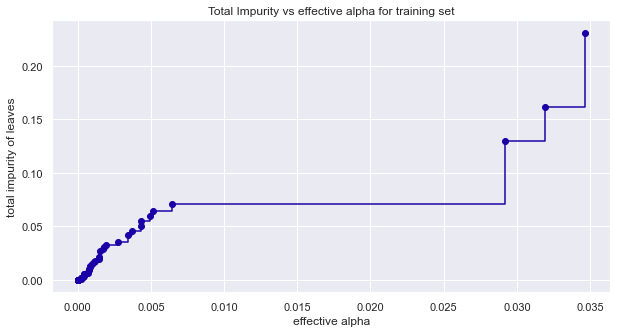

In [152]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Train the decision tree using the effective alphas. The last value in ccp_alphas will be the selected alpha value which we will use to prune the entire tree, leaving the tree with one node.  Tree - clfs (below)

In [153]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23489078075102524


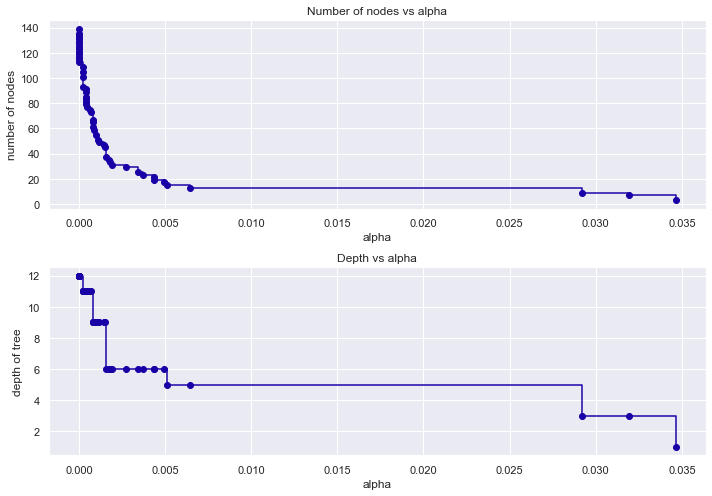

In [154]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [155]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [156]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [157]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

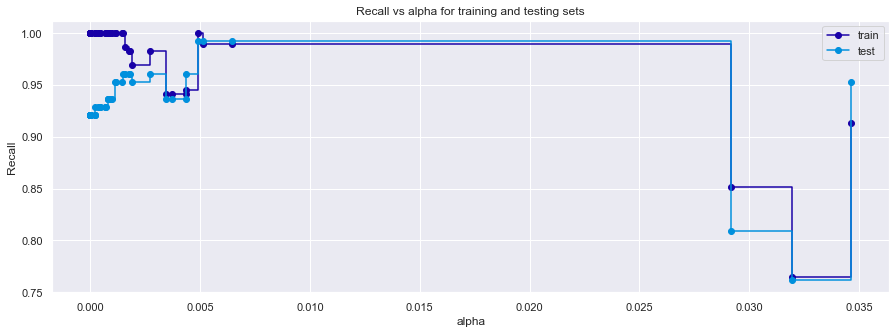

In [158]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* Maximum value of Recall = 0.002 alpha


In [159]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0049254162262545725,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [160]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0049254162262545725,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

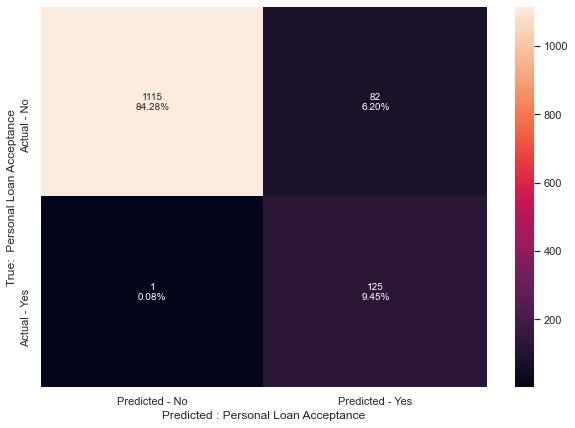

In [161]:
make_confusion_matrix(best_model,y_test)

In [162]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9920634920634921


## Visualize the Decision Tree

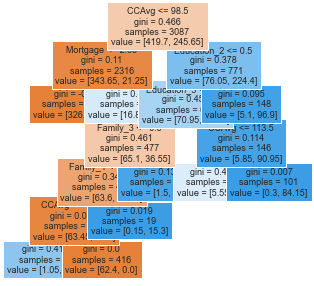

In [163]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

Creating model with 0.002 ccp_alpha

In [164]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

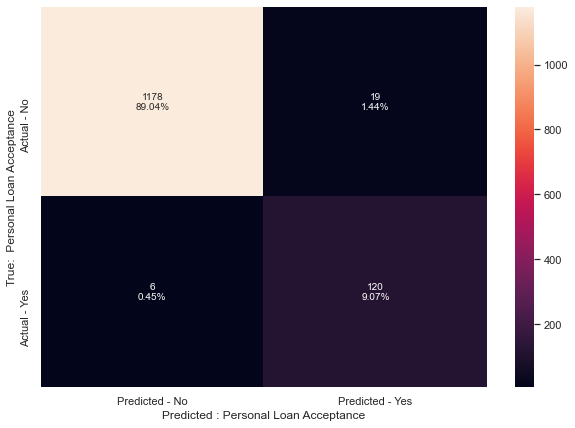

In [165]:
make_confusion_matrix(best_model2,y_test)

* TP:  9.07%
* TN: 80.04%
* FP: 1.4%
* FN: 0.45%


    
    

In [166]:
get_recall_score(best_model2)

Recall on training set :  0.9688581314878892
Recall on test set :  0.9523809523809523


## Visualize the Decision Tree

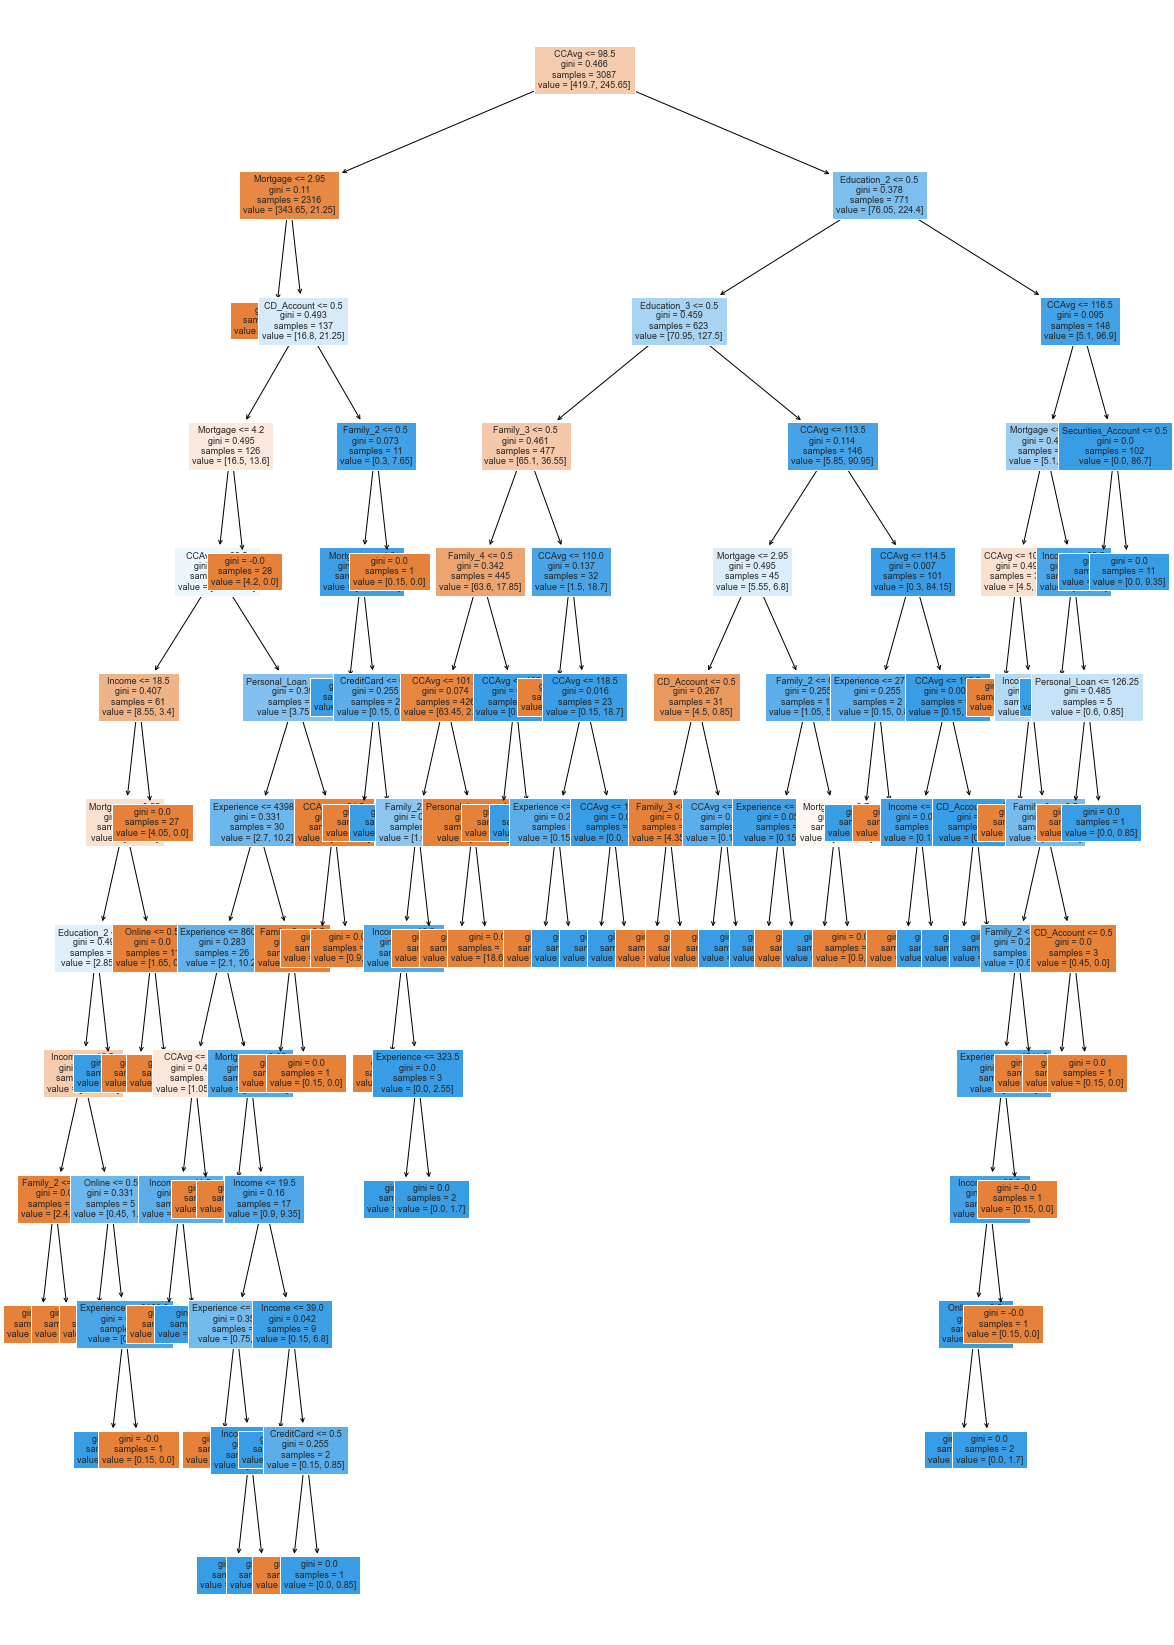

In [167]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

# Text Representation of the Tree

In [168]:
print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- CCAvg <= 98.50
|   |--- Mortgage <= 2.95
|   |   |--- weights: [326.85, 0.00] class: 0
|   |--- Mortgage >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Mortgage <= 4.20
|   |   |   |   |--- CCAvg <= 82.50
|   |   |   |   |   |--- weights: [8.55, 3.40] class: 0
|   |   |   |   |--- CCAvg >  82.50
|   |   |   |   |   |--- weights: [3.75, 10.20] class: 1
|   |   |   |--- Mortgage >  4.20
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.30, 7.65] class: 1
|--- CCAvg >  98.50
|   |--- Education_2 <= 0.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 101.50
|   |   |   |   |   |   |--- weights: [1.05, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  101.50
|   |   |   |   |   |   |--- weights: [62.40, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 15.30] class: 1
|   |   |   |

# Feature Importance

In [169]:
print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.596716
Education_3         0.115785
CCAvg               0.097094
Family_4            0.078706
Family_3            0.056097
Education_2         0.044228
CD_Account          0.011374
const               0.000000
ID                  0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
Family_2            0.000000
mapped_True         0.000000


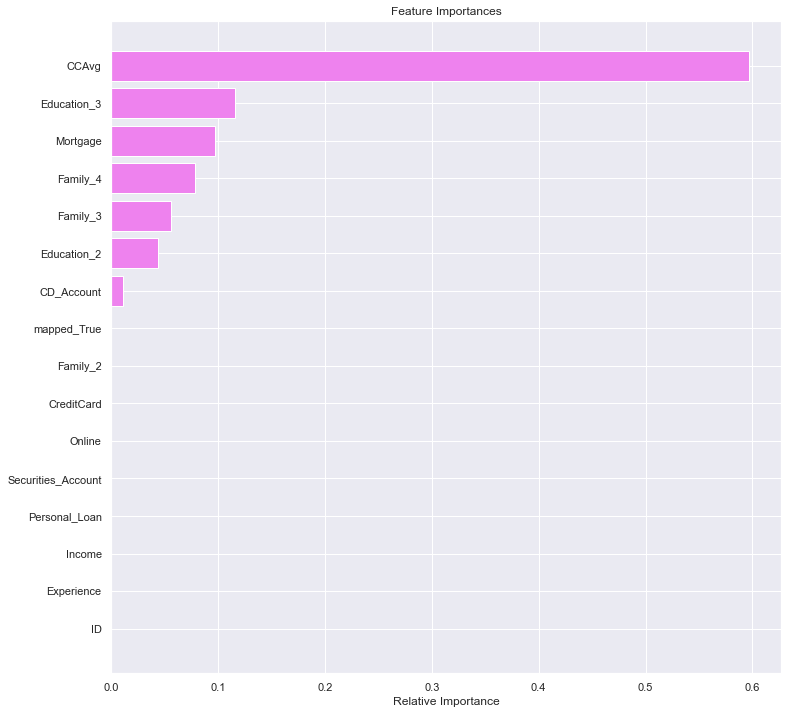

In [170]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Decision Tree is becoming more manageable



In [171]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.83,0.89], 'Test_Recall':[0.30,0.81,0.86]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.30
1  Decision treee with hyperparameter tuning          0.83         0.81
2            Decision tree with post-pruning          0.89         0.86

* We will use the post-pruning version of the model based on the Recall Score.

# 7.  Summary and Conclusions

* Key Takeaways

* Recommendations to Grow the Business





Our goal was to predict whether a liability customer would buy a personal loan or not.

We ask ourselves, what is the risk of loss to AllLifeBank if we incorrectly classify whether a liability customer will buy a personal loan or not?
-- There are 2 possible types of losses  to AllLifeBank by getting the prediction wrong:
* We could inform the marketing campaign that a particular class of customer will buy a loan when in fact they will not buy a personal loan. (FP)
* We may fail to inform the marketing campaign that a particular class of customer will buy a personal loan, and these customers would have indeed bought a personal loan. (FN)

* Which loss is a greater loss?
    1. If we inform AllLife to target a specific customer who never intended to buy, they waste their time and marketing campaign resources. However, there is no loss of revenue. (FP)
    2. If we fail to inform AllLife to target a specific customer class who would have bought, we are not wasting their time, but we are missing potential revenue. This is a greater loss. (FN)

To minimize the impact of FN's, we focused on improving Recall.


The results of our Logistic Regression model revealed that we predicted 8.16% of customers as buying a Personal Loan with a 95.8% accuracy and 81.7% Recall.  Specifically, our model will explain 81.7% of the predictions that indeed turn out to be true (or the True Positive Rate).  The most significant variables are :  Experience, Income, CCAvg, CD_Acct, Families with 3-4 members, and Education levels of Graduation or Advanced Professionals.  The Securities_Acct, Online, and Credit Card are signifiant but negatively correlated in the model.  


The results of our Decision Tree Model predicted that 9.07 % of customers as buying a Personal Loan.  The False Negative rate was 0.45%.  The most significant features are CCAvg, Education (Advanced Professional), Mortgage, Family with 3-4 people, Graduate level Education, and Income.  The recall Post - Pruning yielded the best results, explaining 86% of the TP predictions.

The ideal customer to purchase a loan is:

* Spends monthly on their CC.
* Has a  Graduate or Advanced / Professional level of Education.
* Carries a mortgage.
* Has a family of 3-4 people in their family.
* Has a CD_Account.